# Credit EDA case study

#### Business Objectives


This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

#### Importing the libraries.

In [123]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objs as go
import os
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot

pd.set_option('display.max_columns', 200) # to display all the columns
pd.set_option('display.max_rows',220) # to display all rows of df series
pd.options.display.float_format = '{:.4f}'.format

import warnings
warnings.filterwarnings('ignore')

import random

###  1. Data Importing

In [124]:
# Sample data to overcome Memory Error
# Less RAM: Reduce the data: It's completely fine to take a sample of the data to work on this case study
# Random Sampling to get a random sample of data from the complete data
filename = "application_data.csv"# This file is available is the same location as the jupyter notebook

# Count the number of rows in my file
num_lines = sum(1 for i in open(filename))
# The number of rows that I wanted to load
size = num_lines//2

# Create a random indices between these two numbers

random.seed(10)
skip_id = random.sample(range(1, num_lines), num_lines-size)

In [125]:
# Reading dataset from local

application_data= pd.read_csv(filename, skiprows = skip_id)
application_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100003       0         Cash loans           F            N   
1           100004       0    Revolving loans           M            Y   
2           100008       0         Cash loans           M            N   
3           100009       0         Cash loans           F            Y   
4           100014       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
153750      456246       0         Cash loans           F            N   
153751      456249       0         Cash loans           F            N   
153752      456251       0         Cash loans           M            N   
153753      456253       0         Cash loans           F            N   
153754      456254       1         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  \
0                    N             0       270000.0000 1293502.5000   
1                    Y             0        67500.0000  135000.0000   
2                    Y             0        99000.0000  490495.5000   
3                    Y             1       171000.0000 1560726.0000   
4                    Y             1       112500.0000  652500.0000   
...                ...           ...               ...          ...   
153750               Y             1        94500.0000  225000.0000   
153751               Y             0       112500.0000  225000.0000   
153752               N             0       157500.0000  254700.0000   
153753               Y             0       153000.0000  677664.0000   
153754               Y             0       171000.0000  370107.0000   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0        35698.5000     1129500.0000           Family         State servant   
1         6750.0000      135000.0000    Unaccompanied               Working   
2        27517.5000      454500.0000  Spouse, partner         State servant   
3        41301.0000     1395000.0000    Unaccompanied  Commercial associate   
4        21177.0000      652500.0000    Unaccompanied               Working   
...             ...              ...              ...                   ...   
153750   10620.0000      225000.0000    Unaccompanied               Working   
153751   22050.0000      225000.0000    Unaccompanied             Pensioner   
153752   27558.0000      225000.0000    Unaccompanied               Working   
153753   29979.0000      585000.0000    Unaccompanied               Working   
153754   20205.0000      319500.0000    Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0                    Higher education               Married   
1       Secondary / secondary special  Single / not married   
2       Secondary / secondary special               Married   
3                    Higher education               Married   
4                    Higher education               Married   
...                               ...                   ...   
153750  Secondary / secondary special               Married   
153751  Secondary / secondary special  Single / not married   
153752  Secondary / secondary special             Separated   
153753               Higher education             Separated   
153754  Secondary / secondary special               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                      0.0035      -16765   
1       House / apartment                      0.0100      -19046   
2       House / apartment                      0.0358      -16941   
3       House / apartment                      0.0358      -13778   
4       House / apartment                      0.0228      -10197   
...                   ...                         ...         ...   
153750  House / apartment                      0.0110      -16063   
153751  

## 2. Data Quality Check

### 2.A. Find the percentage of missing values of the columns

In [126]:
# Determining the shape of the datset

application_data.shape

(153755, 122)

In [127]:
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153755 entries, 0 to 153754
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [128]:
# funcion to get null value
def column_wise_null_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output

In [129]:
# get missign values of all columns
cleancol = column_wise_null_percentage(application_data)
cleancol

SK_ID_CURR                      0.0000
TARGET                          0.0000
NAME_CONTRACT_TYPE              0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
CNT_CHILDREN                    0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0000
AMT_GOODS_PRICE                 0.0900
NAME_TYPE_SUITE                 0.4300
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
OWN_CAR_AGE                    65.9800
FLAG_MOBIL                      0.0000
FLAG_EMP_PHONE                  0.0000
FLAG_WORK_PHONE                 0.0000
FLAG_CONT_MOBILE         

In [130]:
# identify columns only with null values
cleancol = cleancol[cleancol>0]
cleancol

AMT_GOODS_PRICE                 0.0900
NAME_TYPE_SUITE                 0.4300
OWN_CAR_AGE                    65.9800
OCCUPATION_TYPE                31.3400
EXT_SOURCE_1                   56.1300
EXT_SOURCE_2                    0.2100
EXT_SOURCE_3                   19.7300
APARTMENTS_AVG                 50.7200
BASEMENTAREA_AVG               58.4700
YEARS_BEGINEXPLUATATION_AVG    48.7800
YEARS_BUILD_AVG                66.5000
COMMONAREA_AVG                 69.8700
ELEVATORS_AVG                  53.2300
ENTRANCES_AVG                  50.3100
FLOORSMAX_AVG                  49.7400
FLOORSMIN_AVG                  67.8900
LANDAREA_AVG                   59.3100
LIVINGAPARTMENTS_AVG           68.4100
LIVINGAREA_AVG                 50.1700
NONLIVINGAPARTMENTS_AVG        69.5100
NONLIVINGAREA_AVG              55.1500
APARTMENTS_MODE                50.7200
BASEMENTAREA_MODE              58.4700
YEARS_BEGINEXPLUATATION_MODE   48.7800
YEARS_BUILD_MODE               66.5000
COMMONAREA_MODE          

### 2.B. Identify and remove columns with high missing percentage (>50%)

In [131]:
# Get the column with null values more than 50%
cleancol_50 = cleancol[cleancol>50]
print("Number of columns having null value more than 50% :", len(cleancol_50.index))
print(cleancol_50)

Number of columns having null value more than 50% : 41
OWN_CAR_AGE                65.9800
EXT_SOURCE_1               56.1300
APARTMENTS_AVG             50.7200
BASEMENTAREA_AVG           58.4700
YEARS_BUILD_AVG            66.5000
COMMONAREA_AVG             69.8700
ELEVATORS_AVG              53.2300
ENTRANCES_AVG              50.3100
FLOORSMIN_AVG              67.8900
LANDAREA_AVG               59.3100
LIVINGAPARTMENTS_AVG       68.4100
LIVINGAREA_AVG             50.1700
NONLIVINGAPARTMENTS_AVG    69.5100
NONLIVINGAREA_AVG          55.1500
APARTMENTS_MODE            50.7200
BASEMENTAREA_MODE          58.4700
YEARS_BUILD_MODE           66.5000
COMMONAREA_MODE            69.8700
ELEVATORS_MODE             53.2300
ENTRANCES_MODE             50.3100
FLOORSMIN_MODE             67.8900
LANDAREA_MODE              59.3100
LIVINGAPARTMENTS_MODE      68.4100
LIVINGAREA_MODE            50.1700
NONLIVINGAPARTMENTS_MODE   69.5100
NONLIVINGAREA_MODE         55.1500
APARTMENTS_MEDI            50.7200


* Droped all columns from Dataframe for which missing value percentage are more than 50%.

`````````````
       'OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'
```````````

In [132]:
# removed 41 columns having null percentage more than 50%.
application_data = application_data.drop(cleancol_50.index, axis =1)
application_data.shape

(153755, 81)

In [133]:
# Get columns having <14% null values
cleancol_14 = cleancol[cleancol<14]
print("Number of columns having null value less than 14% :", len(cleancol_14.index))
print(cleancol_14)

Number of columns having null value less than 14% : 13
AMT_GOODS_PRICE               0.0900
NAME_TYPE_SUITE               0.4300
EXT_SOURCE_2                  0.2100
OBS_30_CNT_SOCIAL_CIRCLE      0.3500
DEF_30_CNT_SOCIAL_CIRCLE      0.3500
OBS_60_CNT_SOCIAL_CIRCLE      0.3500
DEF_60_CNT_SOCIAL_CIRCLE      0.3500
AMT_REQ_CREDIT_BUREAU_HOUR   13.3200
AMT_REQ_CREDIT_BUREAU_DAY    13.3200
AMT_REQ_CREDIT_BUREAU_WEEK   13.3200
AMT_REQ_CREDIT_BUREAU_MON    13.3200
AMT_REQ_CREDIT_BUREAU_QRT    13.3200
AMT_REQ_CREDIT_BUREAU_YEAR   13.3200
dtype: float64


In [134]:
cleancol_14.index

Index(['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [135]:
# understand the insight of missing columns having <14% null values
application_data[cleancol_14.index].describe()

AMT_GOODS_PRICE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
count      153610.0000   153426.0000               153219.0000   
mean       538757.8349        0.5142                    1.4192   
std        369197.4806        0.1911                    2.4844   
min         45000.0000        0.0000                    0.0000   
25%        238500.0000        0.3925                    0.0000   
50%        450000.0000        0.5660                    0.0000   
75%        679500.0000        0.6634                    2.0000   
max       4050000.0000        0.8550                  348.0000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count               153219.0000               153219.0000   
mean                     0.1436                    1.4023   
std                      0.4508                    2.4620   
min                      0.0000                    0.0000   
25%                      0.0000                    0.0000   
50%                      0.0000                    0.0000   
75%                      0.0000                    2.0000   
max                     34.0000                  344.0000   

       DEF_60_CNT_SOCIAL_CIRCLE  AMT_REQ_CREDIT_BUREAU_HOUR  \
count               153219.0000                 133278.0000   
mean                     0.0999                      0.0062   
std                      0.3648                      0.0816   
min                      0.0000                      0.0000   
25%                      0.0000                      0.0000   
50%                      0.0000                      0.0000   
75%                      0.0000                      0.0000   
max                     24.0000                      3.0000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                133278.0000                 133278.0000   
mean                      0.0069                      0.0348   
std                       0.1081                      0.2079   
min                       0.0000                      0.0000   
25%                       0.0000                      0.0000   
50%                       0.0000                      0.0000   
75%                       0.0000                      0.0000   
max                       6.0000                      8.0000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count                133278.0000                133278.0000   
mean                      0.2714                     0.2629   
std                       0.9368                     0.6104   
min                       0.0000                     0.0000   
25%                       0.0000                     0.0000   
50%                       0.0000                     0.0000   
75%                       0.0000                     0.0000   
max                      24.0000                     8.0000   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count                 133278.0000  
mean                       1.9037  
std                        1.8743  
min                        0.0000  
25%                        0.0000  
50%                        1.0000  
75%                        3.0000  
max                       25.0000

In [136]:
# get the count, size and Unique value in each column of application data
application_data.agg(['count','size','unique'])

SK_ID_CURR  TARGET  \
count                                              153755  153755   
size                                               153755  153755   
unique  [100003, 100004, 100008, 100009, 100014, 10001...  [0, 1]   

                   NAME_CONTRACT_TYPE  CODE_GENDER FLAG_OWN_CAR  \
count                          153755       153755       153755   
size                           153755       153755       153755   
unique  [Cash loans, Revolving loans]  [F, M, XNA]       [N, Y]   

       FLAG_OWN_REALTY                                    CNT_CHILDREN  \
count           153755                                          153755   
size            153755                                          153755   
unique          [N, Y]  [0, 1, 2, 3, 7, 4, 6, 5, 8, 9, 10, 12, 14, 19]   

                                         AMT_INCOME_TOTAL  \
count                                              153755   
size                                               153755   
unique  [270000.0, 67500.0, 99000.0, 171000.0, 112500....   

                                               AMT_CREDIT  \
count                                              153755   
size                                               153755   
unique  [1293502.5, 135000.0, 490495.5, 1560726.0, 652...   

                                              AMT_ANNUITY  \
count                                              153748   
size                                               153755   
unique  [35698.5, 6750.0, 27517.5, 41301.0, 21177.0, 2...   

                                          AMT_GOODS_PRICE  \
count                                              153610   
size                                               153755   
unique  [1129500.0, 135000.0, 454500.0, 1395000.0, 652...   

                                          NAME_TYPE_SUITE  \
count                                              153099   
size                                               153755   
unique  [Family, Unaccompanied, Spouse, partner, Child...   

                                         NAME_INCOME_TYPE  \
count                                              153755   
size                                               153755   
unique  [State servant, Working, Commercial associate,...   

                                      NAME_EDUCATION_TYPE  \
count                                              153755   
size                                               153755   
unique  [Higher education, Secondary / secondary speci...   

                                       NAME_FAMILY_STATUS  \
count                                              153755   
size                                               153755   
unique  [Married, Single / not married, Civil marriage...   

                                        NAME_HOUSING_TYPE  \
count                                              153755   
size                                               153755   
unique  [House / apartment, Rented apartment, With par...   

                               REGION_POPULATION_RELATIVE  \
count                                              153755   
size                                               153755   
unique  [0.003540999999999999, 0.010032, 0.03579200000...   

                                               DAYS_BIRTH  \
count                                              153755   
size                                               153755   
unique  [-16765, -19046, -16941, -13778, -10197, -8728...   

                                            DAYS_EMPLOYED  \
count                                              153755   
size                                               153755   
unique  [-1188, -225, -1588, -3130, -679, -1157, -191,...   

                                        DAYS_REGISTRATION  \
count                                              153755   
size                                               153755   
unique  [-1186.0, -4260.0, -4970.0, -1213.0, -4427.0, ...   

                   

### 2.C. Suggested imputation for 5 variables  

In [137]:
# identify unique values in the colums having <13% null value 
application_data[cleancol_14.index].nunique().sort_values(ascending=False)

EXT_SOURCE_2                  85833
AMT_GOODS_PRICE                 723
OBS_30_CNT_SOCIAL_CIRCLE         31
OBS_60_CNT_SOCIAL_CIRCLE         30
AMT_REQ_CREDIT_BUREAU_YEAR       23
AMT_REQ_CREDIT_BUREAU_MON        22
AMT_REQ_CREDIT_BUREAU_QRT         9
AMT_REQ_CREDIT_BUREAU_WEEK        8
DEF_60_CNT_SOCIAL_CIRCLE          8
DEF_30_CNT_SOCIAL_CIRCLE          8
AMT_REQ_CREDIT_BUREAU_DAY         7
NAME_TYPE_SUITE                   7
AMT_REQ_CREDIT_BUREAU_HOUR        4
dtype: int64

 For analysis of imputation selecetd 5 varibles.

Continuious variables:
> 'EXT_SOURCE_2','AMT_GOODS_PRICE'

Categorical variables:
> 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','NAME_TYPE_SUITE'

In [138]:
application_data.drop(["OBS_30_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_WEEK","DEF_30_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"],axis=1,inplace=True)


##### Continous variable:

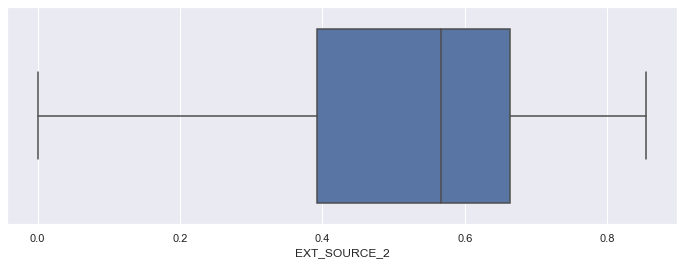

In [139]:
# Box plot for continuious variable
plt.figure(figsize=(12,4))
sns.boxplot(application_data['EXT_SOURCE_2'])
plt.show()

In [140]:
application_data['EXT_SOURCE_2'].median()

0.5659936562921726

The best value for "EXT_SOURCE_2" to impute with is 0.565

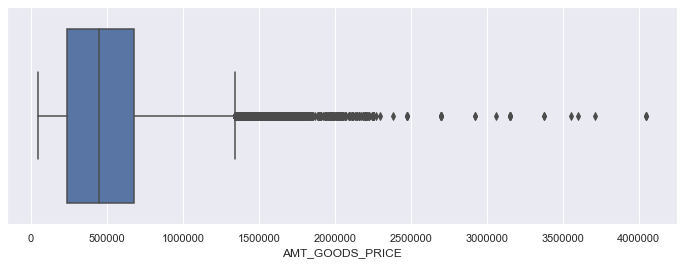

In [141]:
plt.figure(figsize=(12,4))
sns.boxplot(application_data['AMT_GOODS_PRICE'])
plt.show()

In [142]:
application_data['AMT_GOODS_PRICE'].median()

450000.0

The best value for nulls for "AMT_GOODS_PRICE" to impute with is 450000.0

Inference from box plot:

for 'EXT_SOURCE_2' there is no outliers present. And there is no significant diffence observed between mean and median. However data look to be right skewed. So missing values can be imputed with median value: 0.565

for 'AMT_GOODS_PRICE' there is significant number of outlier present in the data. SO data should be imputed with median value: 450000

#### Categorical variables:

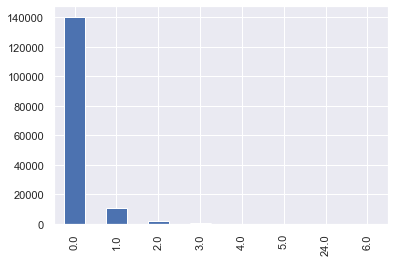

In [143]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts().plot(kind='bar')
plt.show()

In [144]:
# identify maximum frequency values
print('Maximum Frequncy categorical values are,')
print('NAME_TYPE_SUITE: ',application_data['NAME_TYPE_SUITE'].mode()[0])
print('OBS_60_CNT_SOCIAL_CIRCLE:',application_data['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])
print('DEF_60_CNT_SOCIAL_CIRCLE:',application_data['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])

Maximum Frequncy categorical values are,
NAME_TYPE_SUITE:  Unaccompanied
OBS_60_CNT_SOCIAL_CIRCLE: 0.0
DEF_60_CNT_SOCIAL_CIRCLE: 0.0


For categorical variable the value which should be imputed for nulls with maximum in frequency.
So the value to be imputed are:
NAME_TYPE_SUITE: Unaccompanied
OBS_30_CNT_SOCIAL_CIRCLE: 0.0
DEF_30_CNT_SOCIAL_CIRCLE: 0.0
OBS_60_CNT_SOCIAL_CIRCLE: 0.0
DEF_60_CNT_SOCIAL_CIRCLE: 0.0

#### There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and suggest suitable techniques for them

In [145]:
# let's find these categorical columns having these 'XNA' values
    
# For Gender column

application_data[application_data['CODE_GENDER']=='XNA'].shape

(2, 74)

In [146]:
# Describing the Gender column to check the number of females and males

application_data['CODE_GENDER'].value_counts()

F      101183
M       52570
XNA         2
Name: CODE_GENDER, dtype: int64

So, there are 4 rows from Gender column and 55374 rows from Organization type column 

Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.

In [147]:
# For Organization column

application_data[application_data['ORGANIZATION_TYPE']=='XNA'].shape

(27737, 74)

In [148]:
# Describing the organization type column

application_data['ORGANIZATION_TYPE'].describe()


count                     153755
unique                        58
top       Business Entity Type 3
freq                       34113
Name: ORGANIZATION_TYPE, dtype: object

So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% of the column is having this values.
Hence if we impute the rows of total 55374 with NAN, this will not have any major impact on our dataset.

#### 2.d. Check the data type of all the columns and changed the data type.

In [149]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100003       0         Cash loans           F            N   
1      100004       0    Revolving loans           M            Y   
2      100008       0         Cash loans           M            N   
3      100009       0         Cash loans           F            Y   
4      100014       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               N             0       270000.0000 1293502.5000   35698.5000   
1               Y             0        67500.0000  135000.0000    6750.0000   
2               Y             0        99000.0000  490495.5000   27517.5000   
3               Y             1       171000.0000 1560726.0000   41301.0000   
4               Y             1       112500.0000  652500.0000   21177.0000   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0     1129500.0000           Family         State servant   
1      135000.0000    Unaccompanied               Working   
2      454500.0000  Spouse, partner         State servant   
3     1395000.0000    Unaccompanied  Commercial associate   
4      652500.0000    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education               Married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0035      -16765          -1188         -1186.0000   
1                      0.0100      -19046           -225         -4260.0000   
2                      0.0358      -16941          -1588         -4970.0000   
3                      0.0358      -13778          -3130         -1213.0000   
4                      0.0228      -10197           -679         -4427.0000   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -291           1               1                0   
1            -2531           1               1                1   
2             -477           1               1                1   
3             -619           1               1                0   
4             -738           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0      Core staff           2.0000   
1                 1           1           0        Laborers           1.0000   
2                 1           1           0        Laborers           2.0000   
3                 1           1           0     Accountants           3.0000   
4                 1           0           0      Core staff           3.0000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     1                            1   
1                     2                            2   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                     MONDAY                       11   
1                     MONDAY                        9   
2                  WEDNESDAY                       16   
3                     SUNDAY                       16   
4                   SATURDAY                       15   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   


In [150]:
#to get numeric columns
numeric_columns=[]
object_columns = []
for feature in list(application_data.columns):
    if application_data[feature].dtype != "O":
        numeric_columns.append(feature)
    else:
        object_columns.append(feature)
print("Numeric Columns: {}".format(numeric_columns))
print()
print("Object data type Columns: {}".format(object_columns))

Numeric Columns: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOC

In [151]:
application_data[object_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153755 entries, 0 to 153754
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          153755 non-null  object
 1   CODE_GENDER                 153755 non-null  object
 2   FLAG_OWN_CAR                153755 non-null  object
 3   FLAG_OWN_REALTY             153755 non-null  object
 4   NAME_TYPE_SUITE             153099 non-null  object
 5   NAME_INCOME_TYPE            153755 non-null  object
 6   NAME_EDUCATION_TYPE         153755 non-null  object
 7   NAME_FAMILY_STATUS          153755 non-null  object
 8   NAME_HOUSING_TYPE           153755 non-null  object
 9   OCCUPATION_TYPE             105573 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  153755 non-null  object
 11  ORGANIZATION_TYPE           153755 non-null  object
 12  EMERGENCYSTATE_MODE         80891 non-null   object
dtypes: object(13)
memory usage: 1

In [152]:
for feature in object_columns:
    print(feature," : ")
    print(application_data[feature].value_counts())
    print()

NAME_CONTRACT_TYPE  : 
Cash loans         139179
Revolving loans     14576
Name: NAME_CONTRACT_TYPE, dtype: int64

CODE_GENDER  : 
F      101183
M       52570
XNA         2
Name: CODE_GENDER, dtype: int64

FLAG_OWN_CAR  : 
N    101446
Y     52309
Name: FLAG_OWN_CAR, dtype: int64

FLAG_OWN_REALTY  : 
Y    106884
N     46871
Name: FLAG_OWN_REALTY, dtype: int64

NAME_TYPE_SUITE  : 
Unaccompanied      124334
Family              20010
Spouse, partner      5717
Children             1655
Other_B               841
Other_A               416
Group of people       126
Name: NAME_TYPE_SUITE, dtype: int64

NAME_INCOME_TYPE  : 
Working                 79195
Commercial associate    35951
Pensioner               27730
State servant           10856
Unemployed                 12
Businessman                 6
Student                     4
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

NAME_EDUCATION_TYPE  : 
Secondary / secondary special    109176
Higher education                  37

In [153]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

application_data[numeric_columns]=application_data[numeric_columns].apply(pd.to_numeric)
application_data.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100003       0         Cash loans           F            N   
1      100004       0    Revolving loans           M            Y   
2      100008       0         Cash loans           M            N   
3      100009       0         Cash loans           F            Y   
4      100014       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               N             0       270000.0000 1293502.5000   35698.5000   
1               Y             0        67500.0000  135000.0000    6750.0000   
2               Y             0        99000.0000  490495.5000   27517.5000   
3               Y             1       171000.0000 1560726.0000   41301.0000   
4               Y             1       112500.0000  652500.0000   21177.0000   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0     1129500.0000           Family         State servant   
1      135000.0000    Unaccompanied               Working   
2      454500.0000  Spouse, partner         State servant   
3     1395000.0000    Unaccompanied  Commercial associate   
4      652500.0000    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education               Married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0035      -16765          -1188         -1186.0000   
1                      0.0100      -19046           -225         -4260.0000   
2                      0.0358      -16941          -1588         -4970.0000   
3                      0.0358      -13778          -3130         -1213.0000   
4                      0.0228      -10197           -679         -4427.0000   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -291           1               1                0   
1            -2531           1               1                1   
2             -477           1               1                1   
3             -619           1               1                0   
4             -738           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0      Core staff           2.0000   
1                 1           1           0        Laborers           1.0000   
2                 1           1           0        Laborers           2.0000   
3                 1           1           0     Accountants           3.0000   
4                 1           0           0      Core staff           3.0000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     1                            1   
1                     2                            2   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                     MONDAY                       11   
1                     MONDAY                        9   
2                  WEDNESDAY                       16   
3                     SUNDAY                       16   
4                   SATURDAY                       15   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   


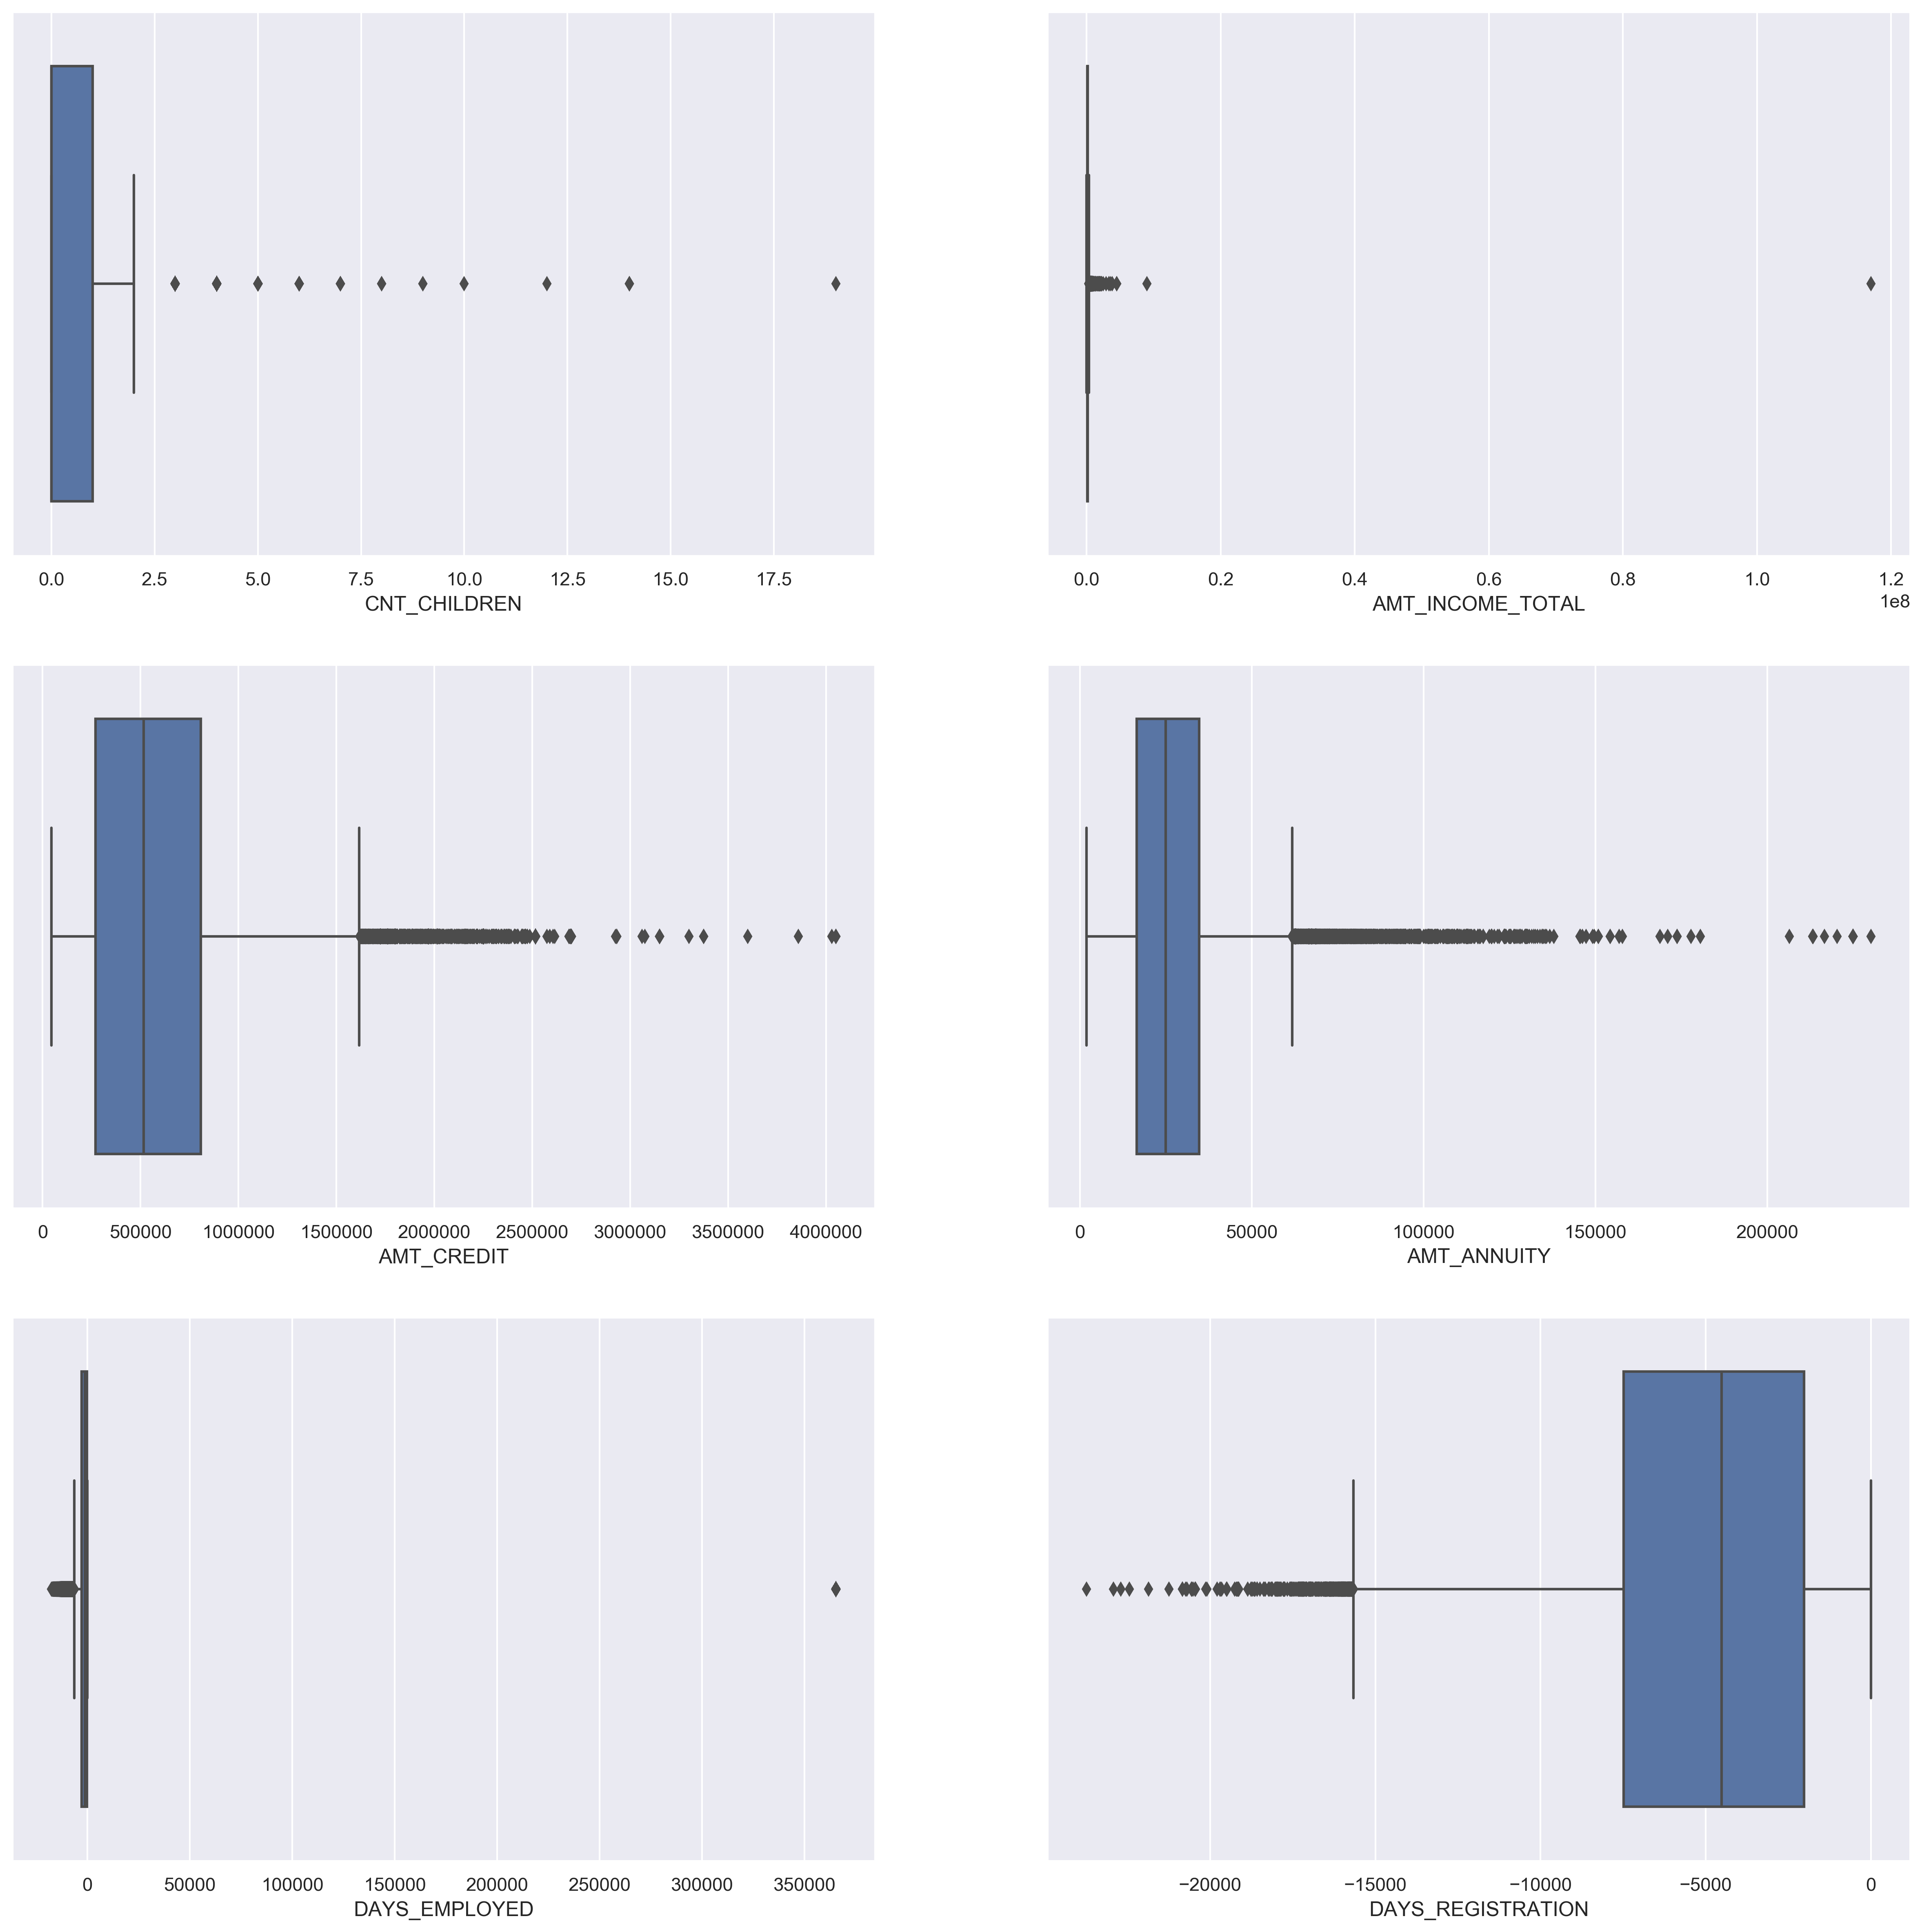

In [154]:
# Box plot for selected columns
features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_EMPLOYED', 'DAYS_REGISTRATION']

plt.figure(figsize = (20, 20), dpi=300)
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data =application_data)
plt.show()

**Inference on box plot**

From the above box plot and descibe analysis we found that following are the numeric columns are having outliers:
~~~~~~~~~
CNT_CHILDREN, AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED, DAYS_REGISTRATION
~~~~~~~~

The first quartile almost missing for CNT_CHILDREN that means most of the data are present in the first quartile.

There is single high value data point as outlier present in AMT_INCOME_TOTAL and Removal this point will dtrasticaly impact the box plot for further analysis.

The first quartiles is slim compare to third quartile for AMT_CREDIT,AMT_ANNUITY, DAYS_EMPLOYED, DAYS_REGISTRATION. This mean data are skewed towards first quartile.



Following age/days columns are having -ve value, which needs to converted to  +ve value.

```
'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE',
```

In [155]:
# Converting '-ve' values into '+ve' Values
application_data['DAYS_BIRTH'] = application_data['DAYS_BIRTH'].abs()
application_data['DAYS_EMPLOYED'] = application_data['DAYS_EMPLOYED'].abs()
application_data['DAYS_REGISTRATION'] = application_data['DAYS_REGISTRATION'].abs()
application_data['DAYS_ID_PUBLISH'] = application_data['DAYS_ID_PUBLISH'].abs()
application_data['DAYS_LAST_PHONE_CHANGE'] = application_data['DAYS_LAST_PHONE_CHANGE'].abs()

<h3> 3. Analysing the columns in data set

We will be analysing some columns to get more insight of the data. This columns might give us more infromation about the data

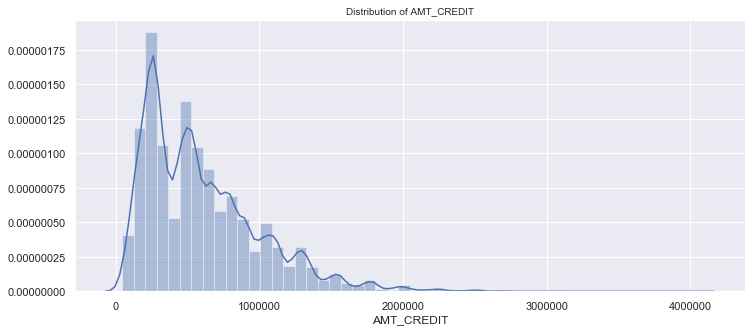

In [156]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(application_data["AMT_CREDIT"])


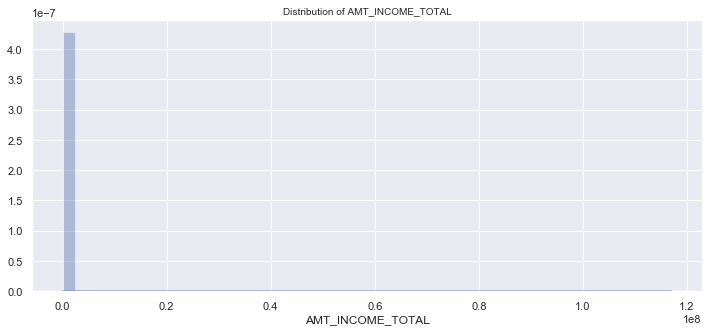

In [157]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(application_data["AMT_INCOME_TOTAL"].dropna())

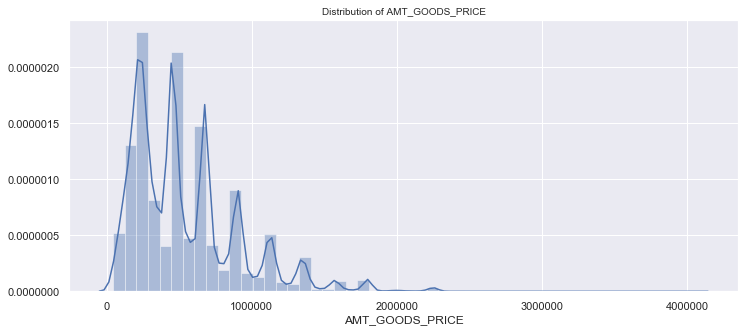

In [158]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(application_data["AMT_GOODS_PRICE"].dropna())

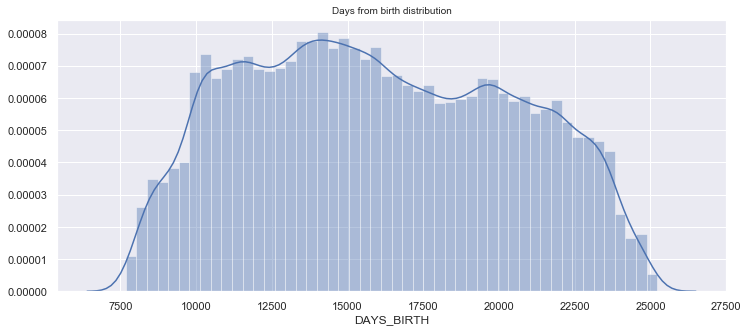

In [159]:
plt.figure(figsize=(12,5))
plt.title("Days from birth distribution")
ax = sns.distplot(application_data["DAYS_BIRTH"].dropna())

The values for days of birth should be negative, but sinces we have used abs() fuction to change the value it is showing the postive value.  The negative value would have mean that the date of birth is in the past. The age range is between approximative 20 and 68 years.

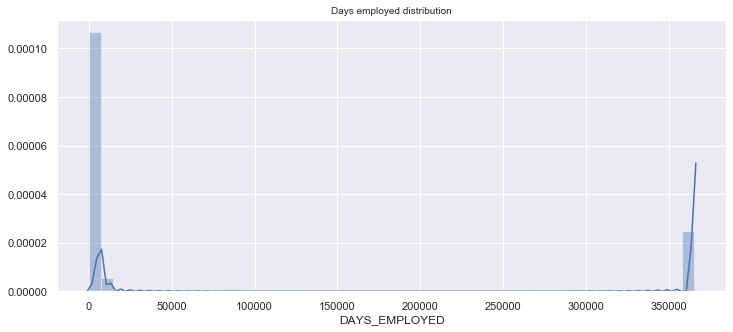

In [160]:
plt.figure(figsize=(12,5))
plt.title("Days employed distribution")
ax = sns.distplot(application_data['DAYS_EMPLOYED'].dropna())

The values for days of employed should be negative, but sinces we have used abs() fuction to change the value it is showing the postive value.The negative values means Days since employed and most probably these negative values means Unemployed. It is not clear what will be the meaning of the very large numbers at the far end (it is not realistic such a large set of people employed more than 100 years).

In [161]:
# We will remove unwanted columns from this dataset
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
          'REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
          'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
          'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
          'FLAG_DOCUMENT_21','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
          'FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE']

application_data.drop(labels=unwanted,axis=1,inplace=True)

### Derived Metrics

Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [162]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

application_data['AMT_INCOME_RANGE']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [163]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

application_data['AMT_CREDIT_RANGE']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=slots)

In [164]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_application_data=application_data.loc[application_data["TARGET"]==0]
target1_application_data=application_data.loc[application_data["TARGET"]==1]


In [165]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(target0_application_data)/len(target1_application_data),2)

11.48

>**The Imbalance ratio is 11.48**

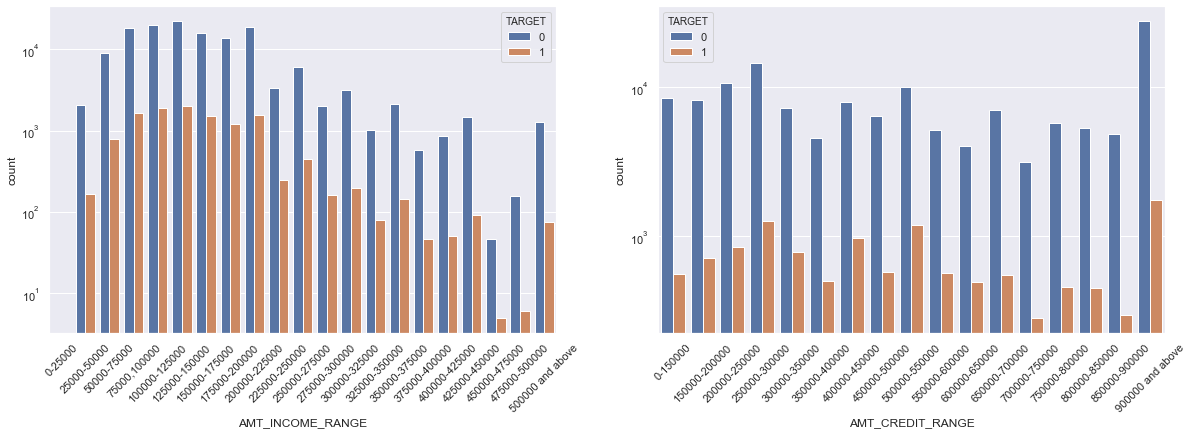

In [166]:
# Categoroical Univariate Analysis in logarithmic scale

features = ['AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE']
plt.figure(figsize = (20, 15))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = application_data)
    
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 45)
    plt.yscale('log')

> AMT_INCOME_RANGE : 
    * The people having 100000-125000 are havign higher number of loan and also having higher in defaulter
    * The income segment having 450000-475000 are having less defaulter.

> AMT_CREDIT_RANGE:
    * The people having 700000-750000 loan are less defaulter.
    * income having more thatn >100000 are almost equal % of loan defaulter

## Univariate and Bivariate Analysis

Univariate:
- Continuous Variable
- Categorical Variable

Bivariate Anlysis:
- Continuous-Continuous

- Continuous-Categorical

- Categorical-Categorical

### 3.A Univariate analysis for categories

#### Univariate analysis of Continuious variables:

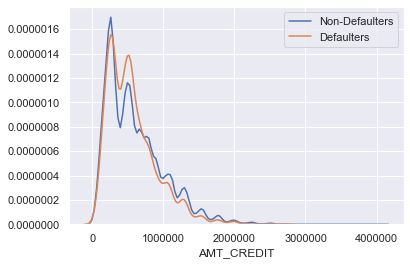

In [167]:
# Continuous Univariate Analysis in distribution for AMT_CREDIT
sns.distplot(target0_application_data["AMT_CREDIT"], hist = False, label = 'Non-Defaulters')
sns.distplot(target1_application_data["AMT_CREDIT"], hist = False, label = 'Defaulters')
plt.show()

> From the above graph we can see that people who have credit amount less than 1000000 has higher rate of dedaulters.

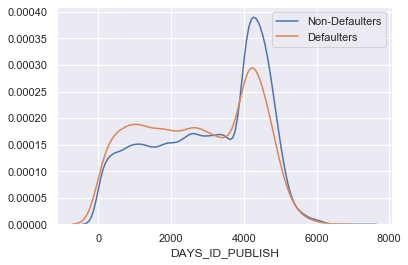

In [168]:
# Continuous Univariate Analysis in distribution for DAYS_ID_PUBLISH
sns.distplot(target0_application_data["DAYS_ID_PUBLISH"], hist = False, label = 'Non-Defaulters')
sns.distplot(target1_application_data["DAYS_ID_PUBLISH"], hist = False, label = 'Defaulters')
plt.show()

>The most of the client have change the identity document with which they have applied for the loan around 4000 to 45000 days before the applications. This numbers are supposed to be negative but due to the use of abs() function in our previous analysis it shows postive number.The negative value would have mean that the days of ID publish is in the past. 

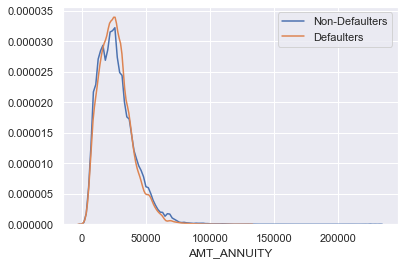

In [169]:
# Continuous Univariate Analysis in distribution for Amt_credit
sns.distplot(target0_application_data["AMT_ANNUITY"], hist = False, label = 'Non-Defaulters')
sns.distplot(target1_application_data["AMT_ANNUITY"], hist = False, label = 'Defaulters')
plt.show()

>The Amount of Annuity is almost similar for Non-Defaulters and Defaulters which is under 50,000

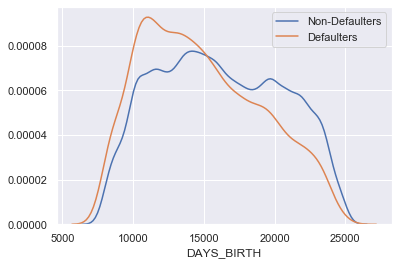

In [170]:
# Continuous Univariate Analysis in distribution for Amt_credit
sns.distplot(target0_application_data["DAYS_BIRTH"], hist = False, label = 'Non-Defaulters')
sns.distplot(target1_application_data["DAYS_BIRTH"], hist = False, label = 'Defaulters')
plt.show()

>The values for days of birth should be negative, but sinces we have used abs() fuction to change the value it is showing the postive value.  The negative value would have mean that the date of birth is in the past. The age range is between approximative 20 and 68 years.

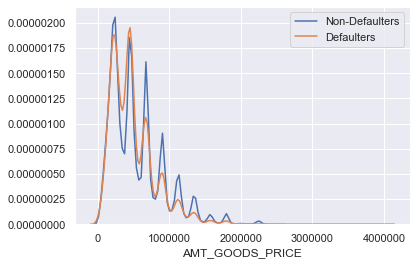

In [171]:
# Continuous Univariate Analysis in distribution for Amt_credit
sns.distplot(target0_application_data["AMT_GOODS_PRICE"], hist = False, label = 'Non-Defaulters')
sns.distplot(target1_application_data["AMT_GOODS_PRICE"], hist = False, label = 'Defaulters')
plt.show()

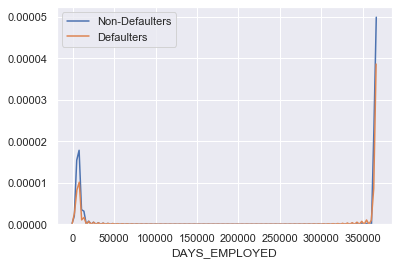

In [172]:
# Continuous Univariate Analysis in distribution for Amt_credit
sns.distplot(target0_application_data["DAYS_EMPLOYED"], hist = False, label = 'Non-Defaulters')
sns.distplot(target1_application_data["DAYS_EMPLOYED"], hist = False, label = 'Defaulters')
plt.show()

>The negative values means Days since employed and most probably these negative values means Unemployed. It is not clear what will be the meaning of the very large numbers at the far end (it is not realistic such a large set of people employed more than 100 years).

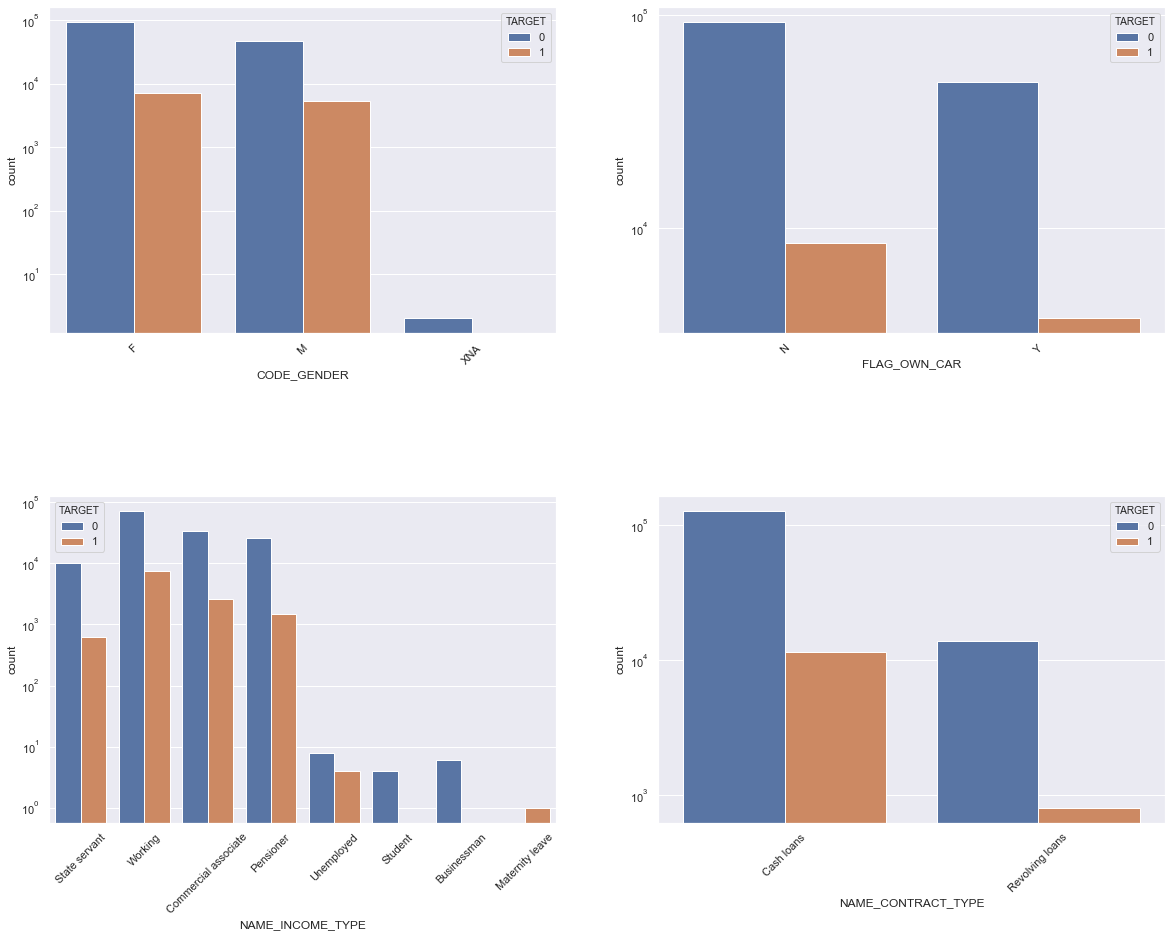

In [173]:
# Categoroical Univariate Analysis in logarithmic scale

features = ['CODE_GENDER', 'FLAG_OWN_CAR','NAME_INCOME_TYPE','NAME_CONTRACT_TYPE']
plt.figure(figsize = (20, 15))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = application_data)
    
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 45)
    plt.yscale('log')
    

##### Insights:<br>


> CODE_GENDER:
    * The % of defaulters are more in Female than Male

> FLAG_OWN_CAR:
    * The person not owning car is having higher percentage of defaulter.

> NAME_INCOME_TYPE:
    * Working, Commercial associate and  pensioner have higher percentage of loan repayment.
    * Working, pensioner and Commercial associates have higher default percentage.
    * Maternity category is significantly higher problem in replayement.

> NAME_CONTRACT_TYPE
    * For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
    * From the above graphs we can see that the Revolving loans are small amount compared to Cash loans and the count of non payment for the cash loans are comapritvely high.

### 3.b. Correlation:

- Find correlation for numerical columns for both the cases i.e. 0 and 1
- Check the variables with highesht correlation are the same in both the files or not?
- Perform univariate for numerical variables for both 0 and 1.Compared the target variable across categories of continuos variables
- Getting top 10 correlation between variables

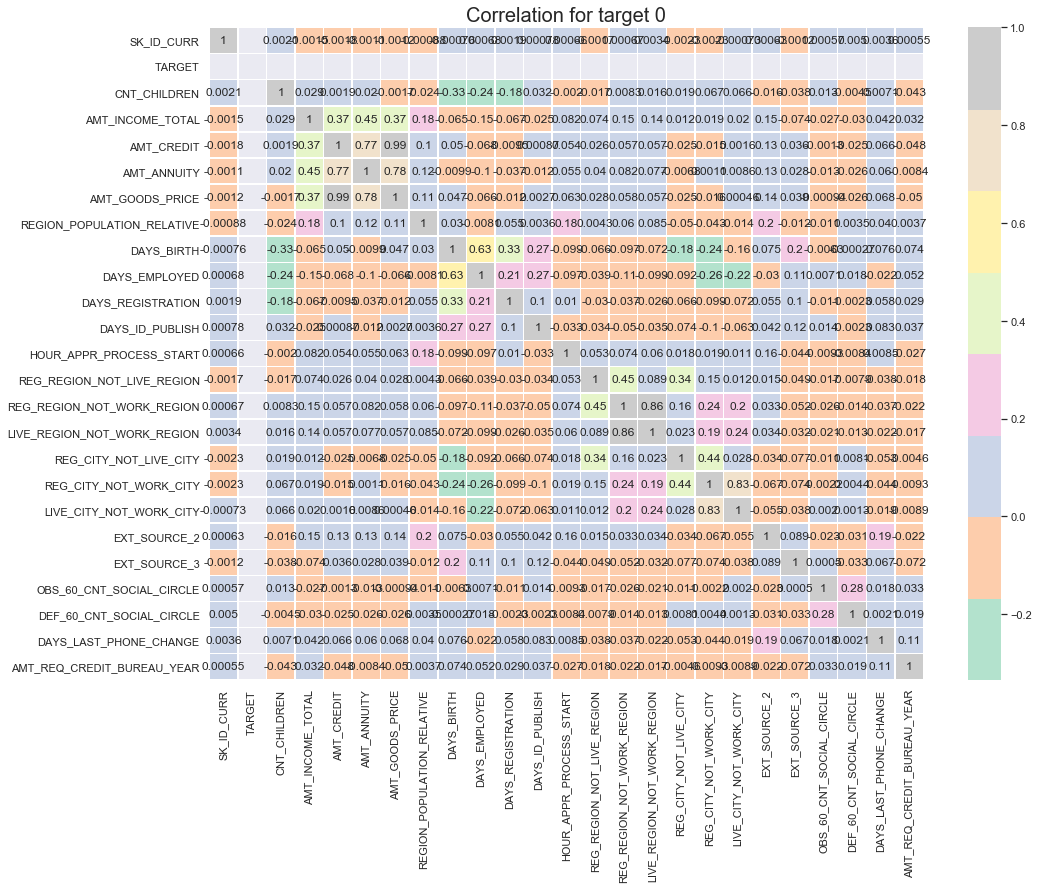

In [174]:
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns.heatmap(target0_application_data.corr(), annot = True, cmap ='Pastel2',linewidths=.5)
ax = plt.axes()


ax.set_title('Correlation for target 0', fontsize = 20)
plt.show()

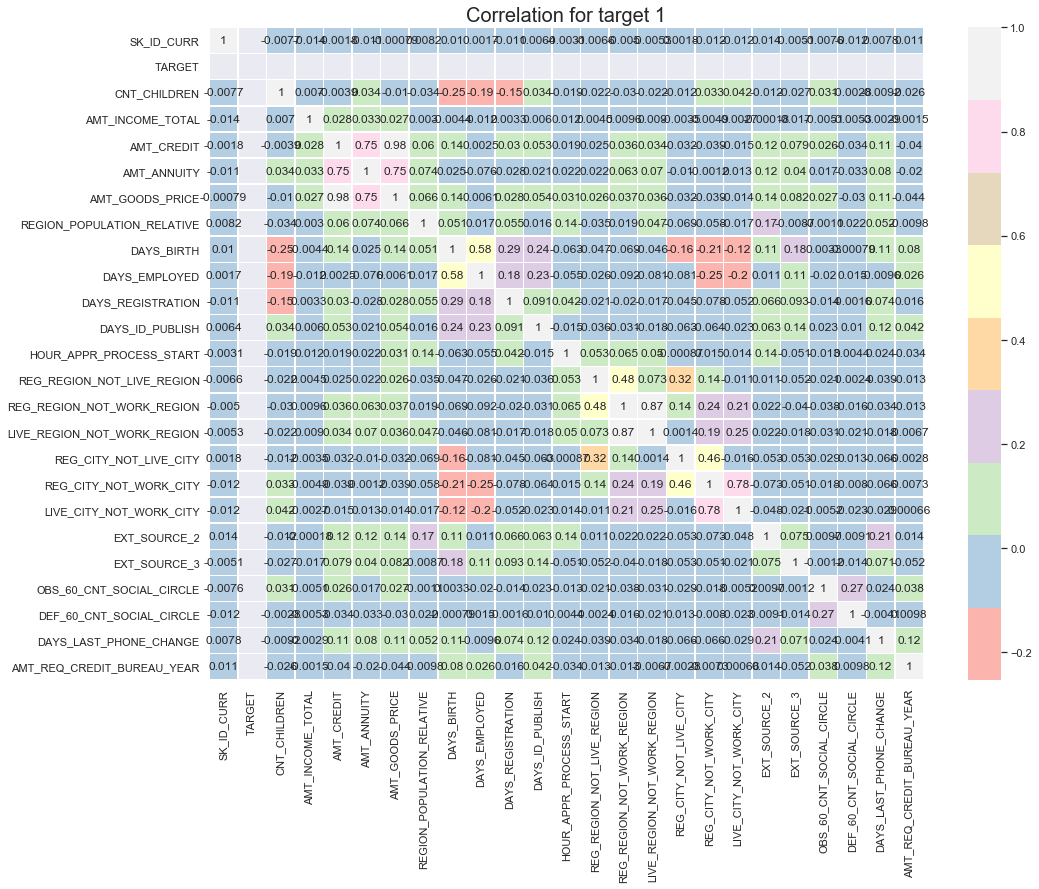

In [175]:
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns.heatmap(target1_application_data.corr(), annot = True, cmap ='Pastel1',linewidths=.5)
ax = plt.axes()


ax.set_title('Correlation for target 1', fontsize = 20)
plt.show()

In [176]:
target0_application_data.shape

(141437, 39)

In [177]:
target0_application_data.corr()

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                       1.0000     nan        0.0021   
TARGET                              nan     nan           nan   
CNT_CHILDREN                     0.0021     nan        1.0000   
AMT_INCOME_TOTAL                -0.0015     nan        0.0290   
AMT_CREDIT                      -0.0018     nan        0.0019   
AMT_ANNUITY                     -0.0011     nan        0.0199   
AMT_GOODS_PRICE                 -0.0012     nan       -0.0017   
REGION_POPULATION_RELATIVE      -0.0009     nan       -0.0242   
DAYS_BIRTH                      -0.0008     nan       -0.3344   
DAYS_EMPLOYED                    0.0007     nan       -0.2436   
DAYS_REGISTRATION                0.0019     nan       -0.1844   
DAYS_ID_PUBLISH                  0.0008     nan        0.0321   
HOUR_APPR_PROCESS_START          0.0007     nan       -0.0020   
REG_REGION_NOT_LIVE_REGION      -0.0017     nan       -0.0167   
REG_REGION_NOT_WORK_REGION       0.0007     nan        0.0083   
LIVE_REGION_NOT_WORK_REGION      0.0034     nan        0.0155   
REG_CITY_NOT_LIVE_CITY          -0.0023     nan        0.0187   
REG_CITY_NOT_WORK_CITY          -0.0023     nan        0.0667   
LIVE_CITY_NOT_WORK_CITY         -0.0007     nan        0.0660   
EXT_SOURCE_2                     0.0006     nan       -0.0164   
EXT_SOURCE_3                    -0.0012     nan       -0.0384   
OBS_60_CNT_SOCIAL_CIRCLE         0.0006     nan        0.0134   
DEF_60_CNT_SOCIAL_CIRCLE         0.0050     nan       -0.0045   
DAYS_LAST_PHONE_CHANGE           0.0036     nan        0.0071   
AMT_REQ_CREDIT_BUREAU_YEAR       0.0006     nan       -0.0428   

                             AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                            -0.0015     -0.0018      -0.0011   
TARGET                                    nan         nan          nan   
CNT_CHILDREN                           0.0290      0.0019       0.0199   
AMT_INCOME_TOTAL                       1.0000      0.3672       0.4471   
AMT_CREDIT                             0.3672      1.0000       0.7713   
AMT_ANNUITY                            0.4471      0.7713       1.0000   
AMT_GOODS_PRICE                        0.3738      0.9872       0.7766   
REGION_POPULATION_RELATIVE             0.1791      0.1026       0.1237   
DAYS_BIRTH                            -0.0653      0.0499      -0.0099   
DAYS_EMPLOYED                         -0.1480     -0.0681      -0.1020   
DAYS_REGISTRATION                     -0.0665     -0.0095      -0.0368   
DAYS_ID_PUBLISH                       -0.0254      0.0009      -0.0119   
HOUR_APPR_PROCESS_START                0.0819      0.0544       0.0547   
REG_REGION_NOT_LIVE_REGION             0.0738      0.0265       0.0403   
REG_REGION_NOT_WORK_REGION             0.1494      0.0569       0.0822   
LIVE_REGION_NOT_WORK_REGION            0.1388      0.0567       0.0772   
REG_CITY_NOT_LIVE_CITY                 0.0124     -0.0251      -0.0068   
REG_CITY_NOT_WORK_CITY                 0.0186     -0.0148       0.0011   
LIVE_CITY_NOT_WORK_CITY                0.0201      0.0016       0.0086   
EXT_SOURCE_2                           0.1497      0.1303       0.1287   
EXT_SOURCE_3                          -0.0737      0.0359       0.0280   
OBS_60_CNT_SOCIAL_CIRCLE              -0.0272     -0.0013      -0.0129   
DEF_60_CNT_SOCIAL_CIRCLE              -0.0301     -0.0251      -0.0261   
DAYS_LAST_PHONE_CHANGE                 0.0415      0.0662       0.0601   
AMT_REQ_CREDIT_BUREAU_YEAR             0.0317     -0.0475      -0.0084   

                             AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                           -0.0012                     -0.0009   
TARGET                                   nan                         nan   
CNT_CHILDREN                         -0.0017                     -0.0242   
AMT_INCOME_TOTAL                      0.3738                      0.1791   
AMT_CREDIT                       

In [178]:
corr = target0_application_data.corr()
corr_target0 = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_target0 = corr_target0.unstack().reset_index().dropna(subset = [0])
corr_target0.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_target0['Corr_abs'] = abs(corr_target0['Correlation_Value'])
corr_target0.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_target0

VAR1                        VAR2  \
154              AMT_GOODS_PRICE                  AMT_CREDIT   
389  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION   
467      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY   
155              AMT_GOODS_PRICE                 AMT_ANNUITY   
129                  AMT_ANNUITY                  AMT_CREDIT   
..                           ...                         ...   
525     OBS_60_CNT_SOCIAL_CIRCLE                  SK_ID_CURR   
600   AMT_REQ_CREDIT_BUREAU_YEAR                  SK_ID_CURR   
545     OBS_60_CNT_SOCIAL_CIRCLE                EXT_SOURCE_3   
456      LIVE_CITY_NOT_WORK_CITY             AMT_GOODS_PRICE   
558     DEF_60_CNT_SOCIAL_CIRCLE                  DAYS_BIRTH   

     Correlation_Value  Corr_abs  
154             0.9872    0.9872  
389             0.8607    0.8607  
467             0.8302    0.8302  
155             0.7766    0.7766  
129             0.7713    0.7713  
..                 ...       ...  
525             0.0006    0.0006  
600             0.0006    0.0006  
545             0.0005    0.0005  
456             0.0005    0.0005  
558            -0.0003    0.0003  

[276 rows x 4 columns]

In [179]:
corr = target1_application_data.corr()
corr_target1 = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_target1 = corr_target1.unstack().reset_index().dropna(subset = [0])
corr_target1.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_target1['Corr_abs'] = abs(corr_target1['Correlation_Value'])
corr_target1.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_target1

VAR1                        VAR2  \
154              AMT_GOODS_PRICE                  AMT_CREDIT   
389  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION   
467      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY   
155              AMT_GOODS_PRICE                 AMT_ANNUITY   
129                  AMT_ANNUITY                  AMT_CREDIT   
..                           ...                         ...   
412       REG_CITY_NOT_LIVE_CITY     HOUR_APPR_PROCESS_START   
558     DEF_60_CNT_SOCIAL_CIRCLE                  DAYS_BIRTH   
150              AMT_GOODS_PRICE                  SK_ID_CURR   
618   AMT_REQ_CREDIT_BUREAU_YEAR     LIVE_CITY_NOT_WORK_CITY   
478                 EXT_SOURCE_2            AMT_INCOME_TOTAL   

     Correlation_Value  Corr_abs  
154             0.9831    0.9831  
389             0.8666    0.8666  
467             0.7816    0.7816  
155             0.7540    0.7540  
129             0.7532    0.7532  
..                 ...       ...  
412            -0.0009    0.0009  
558            -0.0008    0.0008  
150            -0.0008    0.0008  
618             0.0007    0.0007  
478            -0.0002    0.0002  

[276 rows x 4 columns]

In [180]:
# Top 10 correlated variables: target 0 dataaframe

corr_target0.head(10)

VAR1                        VAR2  \
154              AMT_GOODS_PRICE                  AMT_CREDIT   
389  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION   
467      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY   
155              AMT_GOODS_PRICE                 AMT_ANNUITY   
129                  AMT_ANNUITY                  AMT_CREDIT   
233                DAYS_EMPLOYED                  DAYS_BIRTH   
363   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION   
128                  AMT_ANNUITY            AMT_INCOME_TOTAL   
441       REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY   
153              AMT_GOODS_PRICE            AMT_INCOME_TOTAL   

     Correlation_Value  Corr_abs  
154             0.9872    0.9872  
389             0.8607    0.8607  
467             0.8302    0.8302  
155             0.7766    0.7766  
129             0.7713    0.7713  
233             0.6268    0.6268  
363             0.4488    0.4488  
128             0.4471    0.4471  
441             0.4370    0.4370  
153             0.3738    0.3738

In [181]:
# Top 10 correlated variables: target 1 dataaframe

corr_target1.head(10)

VAR1                        VAR2  \
154              AMT_GOODS_PRICE                  AMT_CREDIT   
389  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION   
467      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY   
155              AMT_GOODS_PRICE                 AMT_ANNUITY   
129                  AMT_ANNUITY                  AMT_CREDIT   
233                DAYS_EMPLOYED                  DAYS_BIRTH   
363   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION   
441       REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY   
413       REG_CITY_NOT_LIVE_CITY  REG_REGION_NOT_LIVE_REGION   
258            DAYS_REGISTRATION                  DAYS_BIRTH   

     Correlation_Value  Corr_abs  
154             0.9831    0.9831  
389             0.8666    0.8666  
467             0.7816    0.7816  
155             0.7540    0.7540  
129             0.7532    0.7532  
233             0.5762    0.5762  
363             0.4772    0.4772  
441             0.4626    0.4626  
413             0.3181    0.3181  
258             0.2894    0.2894

>From for the correlation diagram of target 1 and target 0 we can infer that they have similar results. Since there is a positive correlation between Amount of Goods price and amount of annuity which explains that if the price of the goods for which the loan is given is higher the amount of repayment will also be higher 

>same concept applies to the amount of goods price and amount of credit as we can see that they have a higher correlation of almost (~1).

### 3.B Bivariate analysis 

Continuous-Categorical

Continuous-Continuous

Categorical-Categorical



### Continuous - Categorical

**For Target 0**

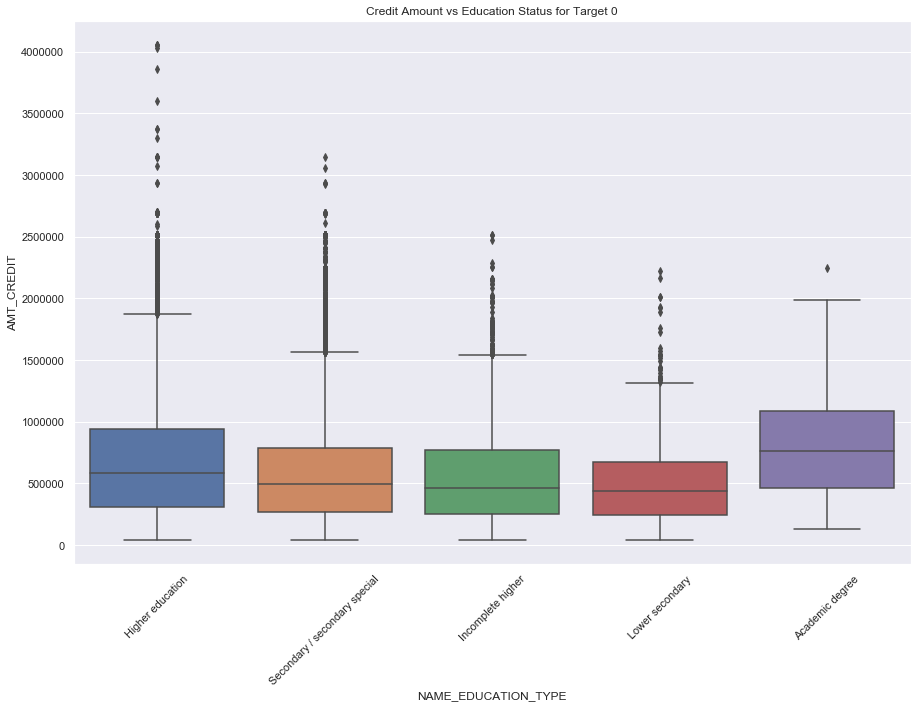

In [182]:
# Box plotting for Credit amount

plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.boxplot(data =target0_application_data, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT')
plt.title('Credit Amount vs Education Status for Target 0')
plt.show()

**For Target 1**

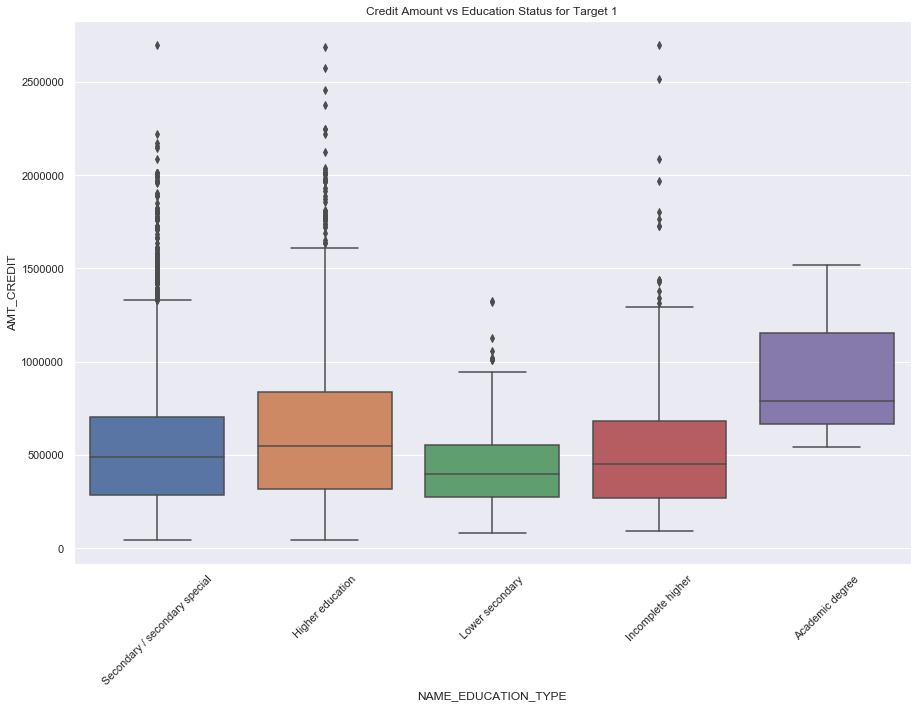

In [183]:
# Box plotting for credit amount

plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.boxplot(data =target1_application_data, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT')#, hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status for Target 1')
plt.show()

>Inference For Target 0
>Academic degree has higher number of amount of credit and has less/no outliers were as Higher education has more outliers 
>Secondary/secondary special and incomplete education has same mean.

>Inference for Target 1
The Lower secondary category, although rare, have the less credit amount then pepole with acedemic degree.
>Secondary/secondary special and Higher education has many outliers and Higher education has highest amount of credit 


**For Target 0**

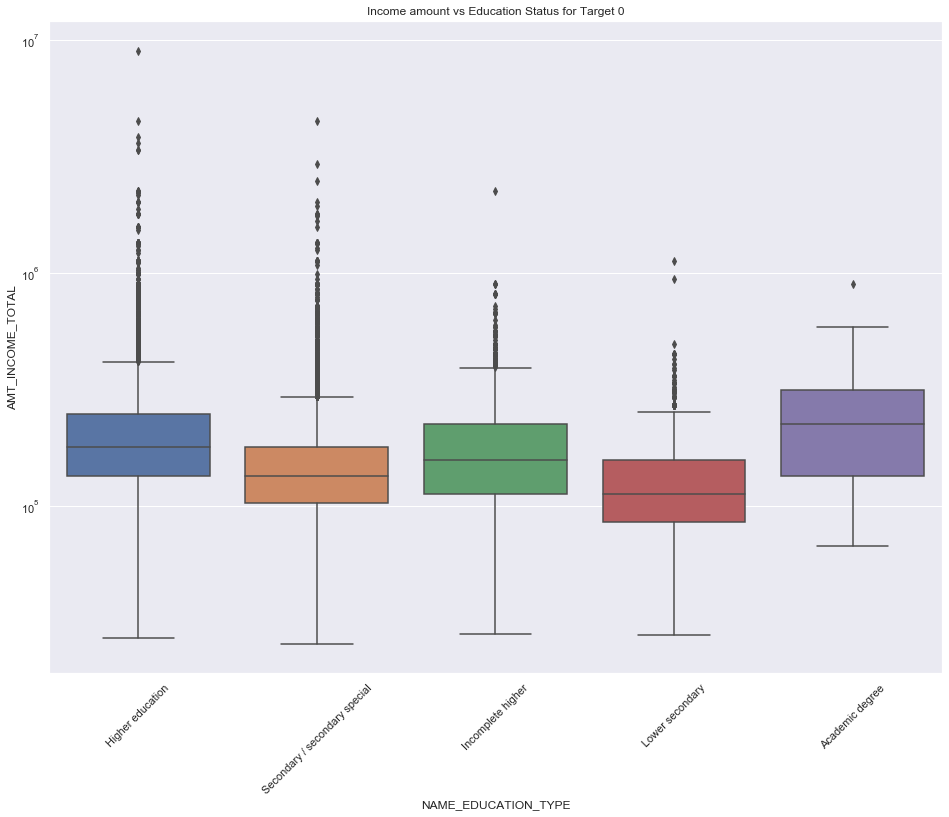

In [184]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_application_data, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL')#, hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for Target 0')
plt.show()

**For Target 1**

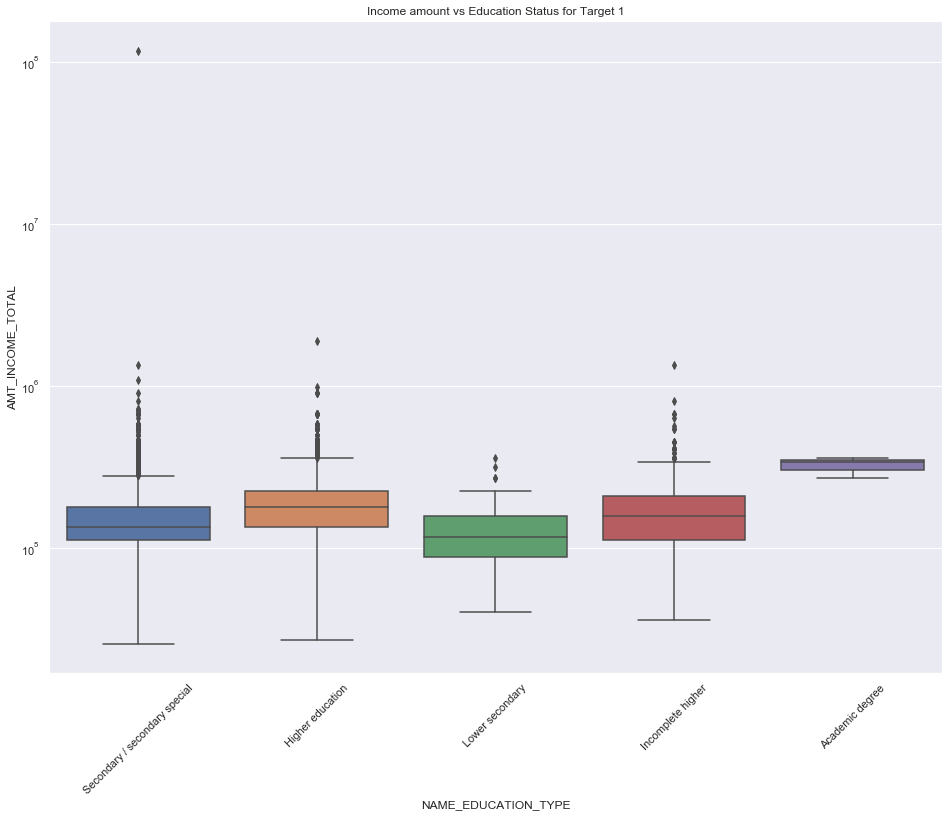

In [185]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1_application_data, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL')#, hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for Target 1')
plt.show()

>For Traget 0
Higher education has more outliers where as academic has less outliers 
Applicant with academic degree have higher Total amount of income where as 

>For Target 1
>There are no outlier for Academic degree and there income amount is also little higher then other education type.
Education type 'Secondary/special education has lot of outliers.
>Lower Secondary has less amount of total income where as incomplete education has more total income from lower secondary.

### Continuous-Continuous

#### AMT_GOODS_PRICE and AMT_CREDIT

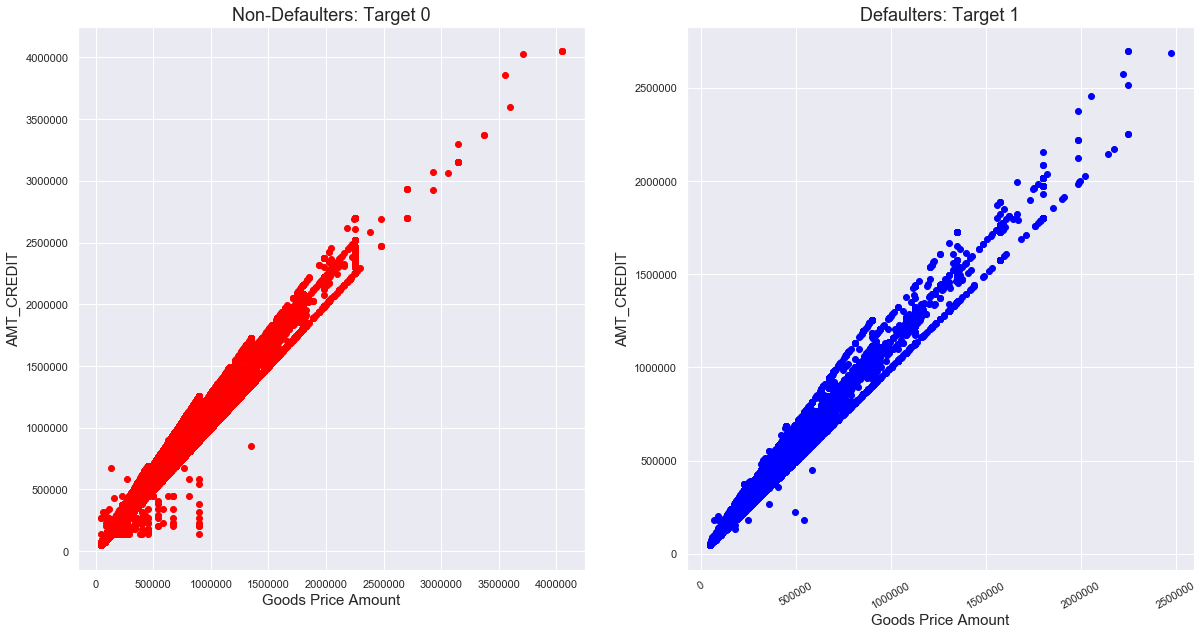

In [186]:
#Analysis between AMT_GOODS_PRICE and AMT_CREDIT

plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.scatter(target0_application_data["AMT_GOODS_PRICE"],target0_application_data["AMT_CREDIT"],c="red")
plt.title("Non-Defaulters: Target 0", fontdict = {'fontsize':18})
plt.xlabel("Goods Price Amount",fontdict = {'fontsize':15})
plt.ylabel("AMT_CREDIT",fontdict = {'fontsize':15})
plt.subplot(1, 2, 2)
plt.scatter(target1_application_data["AMT_GOODS_PRICE"],target1_application_data["AMT_CREDIT"],c="blue")
plt.title("Defaulters: Target 1", fontdict = {'fontsize':18})
plt.xlabel("Goods Price Amount",fontdict = {'fontsize':15})
plt.ylabel("AMT_CREDIT",fontdict = {'fontsize':15})
    
plt.xticks(rotation = 30)
plt.show()

>Since there is a postive corelation between Amount of Goods price and amount of credits which explains that if the price of the goods for which the loan is given is higher the amount of credit will also be higher 
. From Target 1 which is defaulters we get to know that higher the credit amount higher are the chance that the applicant might default on there loan.

#### AMT_GOODS_PRICE and AMT_ANNUITY

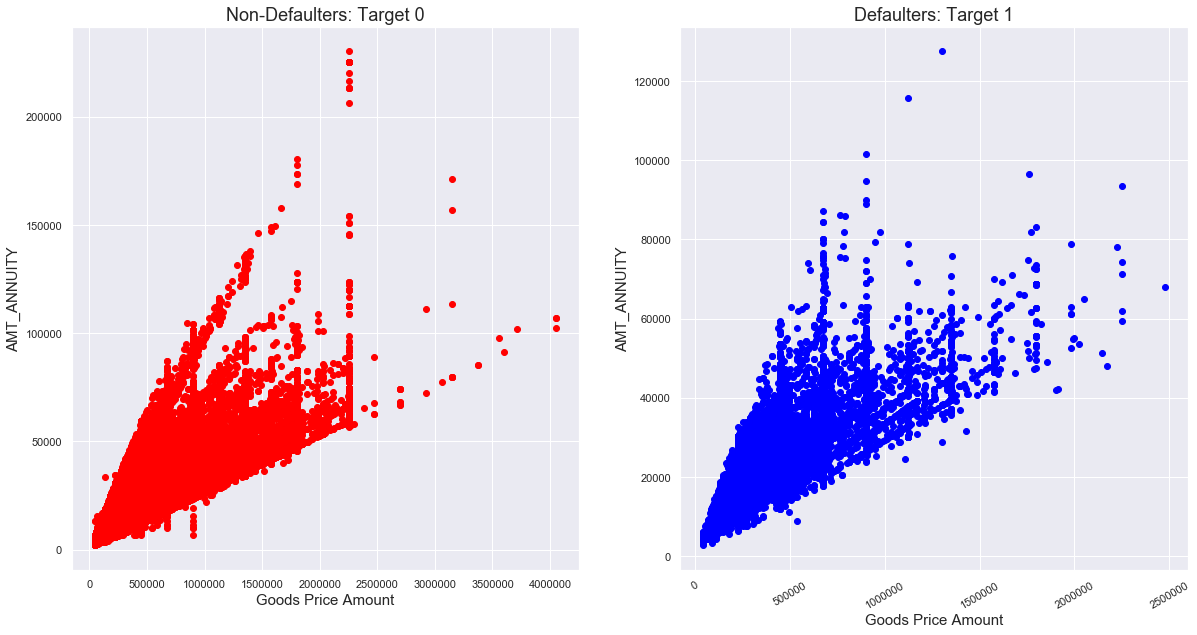

In [187]:
#Analysis between AMT_GOODS_PRICE and AMT_ANNUITY


plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.scatter(target0_application_data["AMT_GOODS_PRICE"],target0_application_data["AMT_ANNUITY"],c="red")
plt.title("Non-Defaulters: Target 0", fontdict = {'fontsize':18})
plt.xlabel("Goods Price Amount",fontdict = {'fontsize':15})
plt.ylabel("AMT_ANNUITY",fontdict = {'fontsize':15})
plt.subplot(1, 2, 2)
plt.scatter(target1_application_data["AMT_GOODS_PRICE"],target1_application_data["AMT_ANNUITY"],c="blue")
plt.title("Defaulters: Target 1", fontdict = {'fontsize':18})
plt.xlabel("Goods Price Amount",fontdict = {'fontsize':15})
plt.ylabel("AMT_ANNUITY",fontdict = {'fontsize':15})
    
plt.xticks(rotation = 30)
plt.show()

>From for the corleation diagram of traget1 and target 1 we can infere thatthay have similar results. Since there is a postive corelation between Amount of Goods price and amount of annunity which explains that if the price of the goods for which the loan is given is higher the amount of repayment will also be higher 

#### AMT_GOODS_PRICE and AMT_INCOME_TOTAL

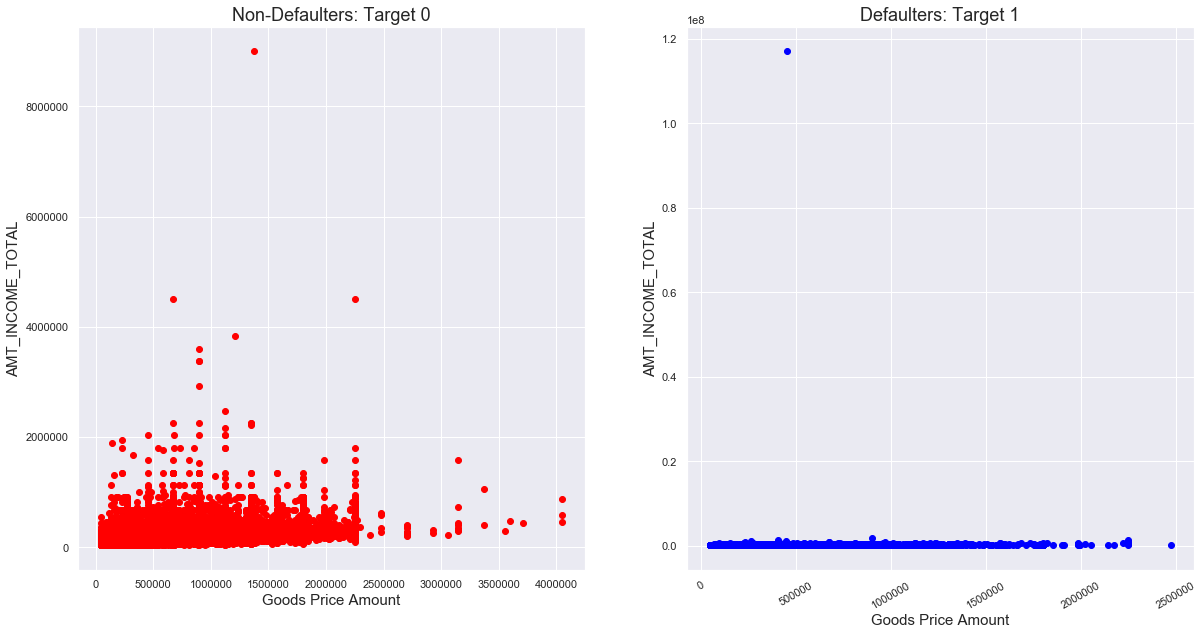

In [188]:
#Analysis between AMT_GOODS_PRICE and AMT_INCOME_TOTAL


plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.scatter(target0_application_data["AMT_GOODS_PRICE"],target0_application_data["AMT_INCOME_TOTAL"],c="red")
plt.title("Non-Defaulters: Target 0", fontdict = {'fontsize':18})
plt.xlabel("Goods Price Amount",fontdict = {'fontsize':15})
plt.ylabel("AMT_INCOME_TOTAL",fontdict = {'fontsize':15})
plt.subplot(1, 2, 2)
plt.scatter(target1_application_data["AMT_GOODS_PRICE"],target1_application_data["AMT_INCOME_TOTAL"],c="blue")
plt.title("Defaulters: Target 1", fontdict = {'fontsize':18})
plt.xlabel("Goods Price Amount",fontdict = {'fontsize':15})
plt.ylabel("AMT_INCOME_TOTAL",fontdict = {'fontsize':15})
    
plt.xticks(rotation = 30)
plt.show()

#### AMT_ANNUITY and AMT_INCOME_TOTAL

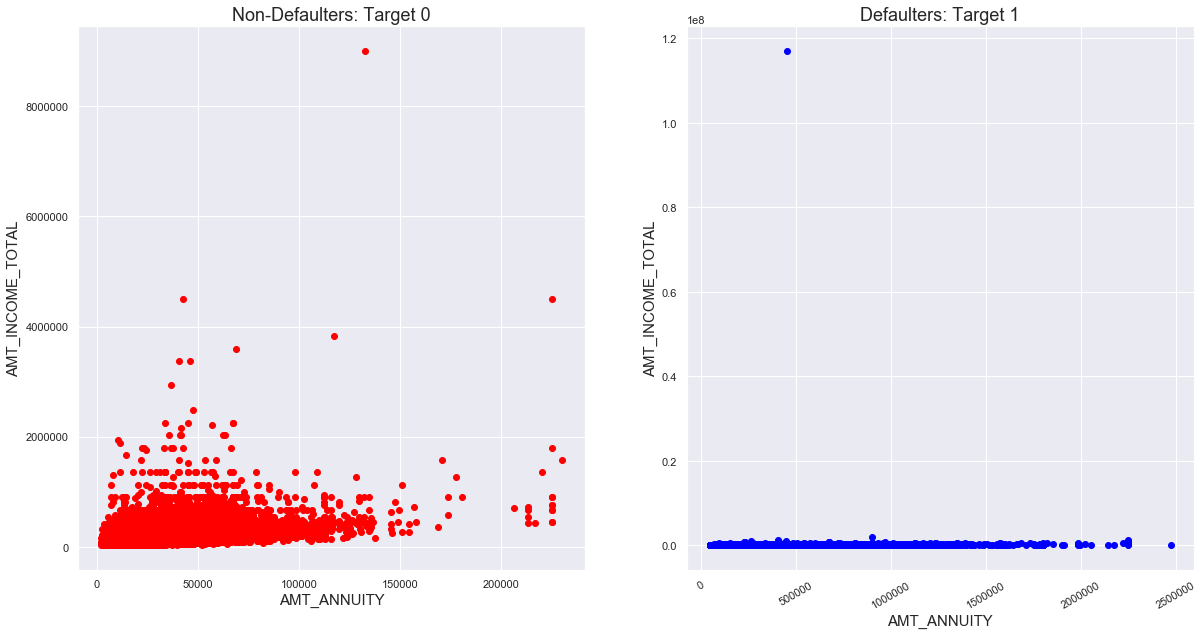

In [189]:
#Analysis between AMT_ANNUITY and AMT_INCOME_TOTAL


plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.scatter(target0_application_data["AMT_ANNUITY"],target0_application_data["AMT_INCOME_TOTAL"],c="red")
plt.title("Non-Defaulters: Target 0", fontdict = {'fontsize':18})
plt.xlabel("AMT_ANNUITY",fontdict = {'fontsize':15})
plt.ylabel("AMT_INCOME_TOTAL",fontdict = {'fontsize':15})
plt.subplot(1, 2, 2)
plt.scatter(target1_application_data["AMT_GOODS_PRICE"],target1_application_data["AMT_INCOME_TOTAL"],c="blue")
plt.title("Defaulters: Target 1", fontdict = {'fontsize':18})
plt.xlabel("AMT_ANNUITY",fontdict = {'fontsize':15})
plt.ylabel("AMT_INCOME_TOTAL",fontdict = {'fontsize':15})
    
plt.xticks(rotation = 30)
plt.show()

### Categorical-Categorical


#### Name_contract_type and Code_Gender

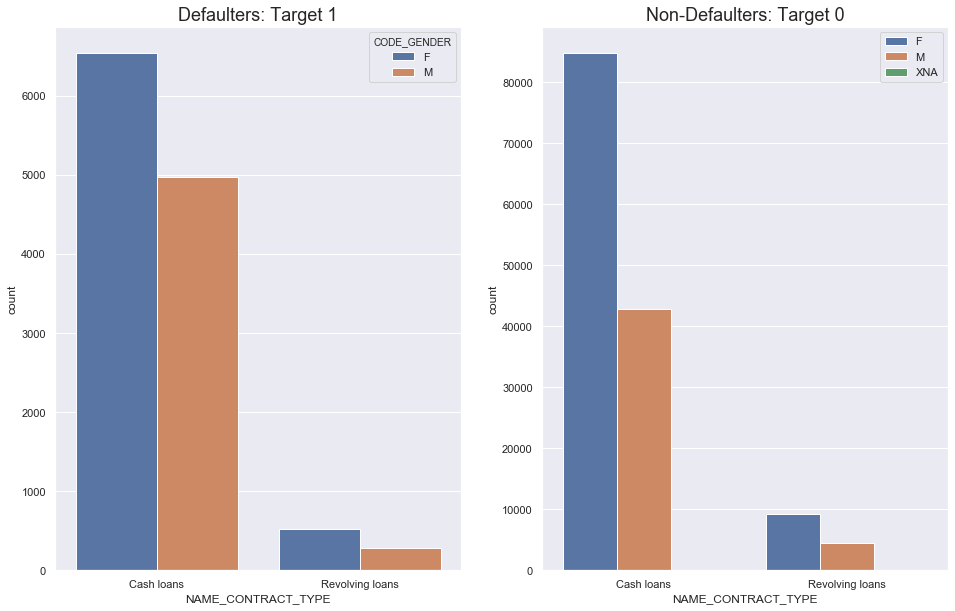

In [190]:
#Analysising Name_contract_type and Code_Gender

plt.figure(figsize = (16, 10))

plt.subplot(1, 2, 1)
sns.countplot(target1_application_data["NAME_CONTRACT_TYPE"],hue="CODE_GENDER",data=target1_application_data)
plt.title("Defaulters: Target 1", fontdict = {'fontsize':18})

plt.subplot(1, 2, 2)
sns.countplot(target0_application_data["NAME_CONTRACT_TYPE"],hue="CODE_GENDER",data=target0_application_data)
plt.title("Non-Defaulters: Target 0", fontdict = {'fontsize':18})
    
plt.xticks(rotation = 0)
plt.legend(loc='upper right')
plt.show()

>Through this graph we get to know that females default the most on cash loan.Females default are 90000 of the application applied.

#### Name Education type and Code_Gender

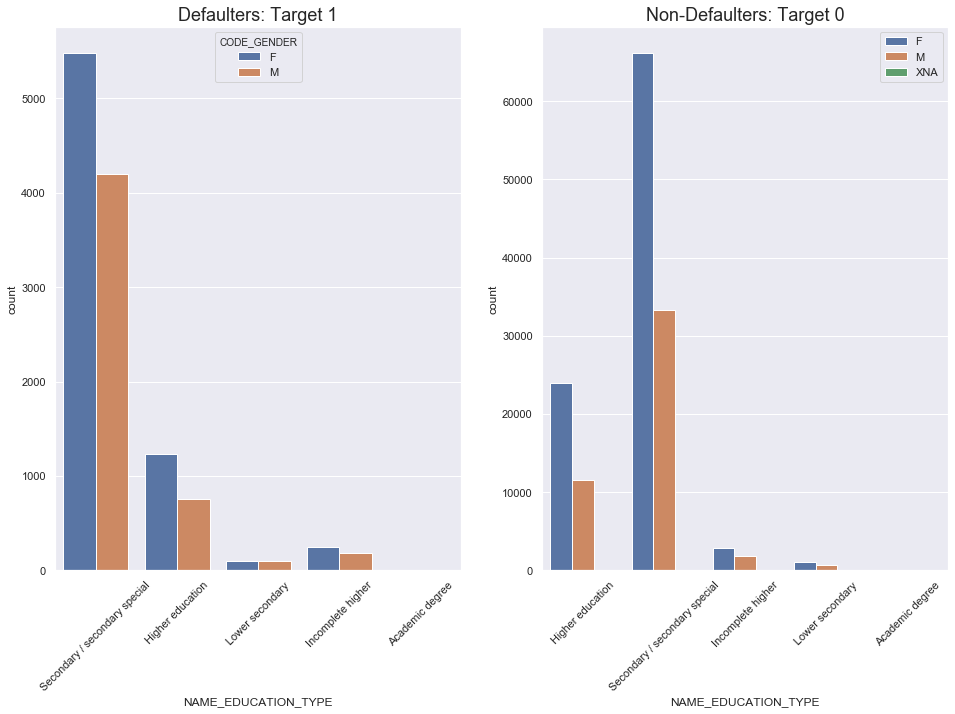

In [191]:
#Analysising Name Education type and Code_Gender

plt.figure(figsize = (16, 10))

plt.subplot(1, 2, 1)
sns.countplot(target1_application_data["NAME_EDUCATION_TYPE"],hue="CODE_GENDER",data=target1_application_data)
plt.title("Defaulters: Target 1", fontdict = {'fontsize':18})
plt.xticks(rotation = 45)
plt.subplot(1, 2, 2)
sns.countplot(target0_application_data["NAME_EDUCATION_TYPE"],hue="CODE_GENDER",data=target0_application_data)
plt.title("Non-Defaulters: Target 0", fontdict = {'fontsize':18})
    
plt.xticks(rotation = 45)
plt.legend(loc='upper right')
plt.show()

>The secondary/secondary special category, although rare, have the largest count of not returning the loan.The people with Academic degree have never defaulted cash or revolving loan.With in the lower secondary category females default more then males on there loan repayment.

>Lower secondary females and males defaulters are equal 

>comparing secondary/secondary special female non-defaulters and female defaulter are equally high  

#### Name Family Status and Name Contrat type


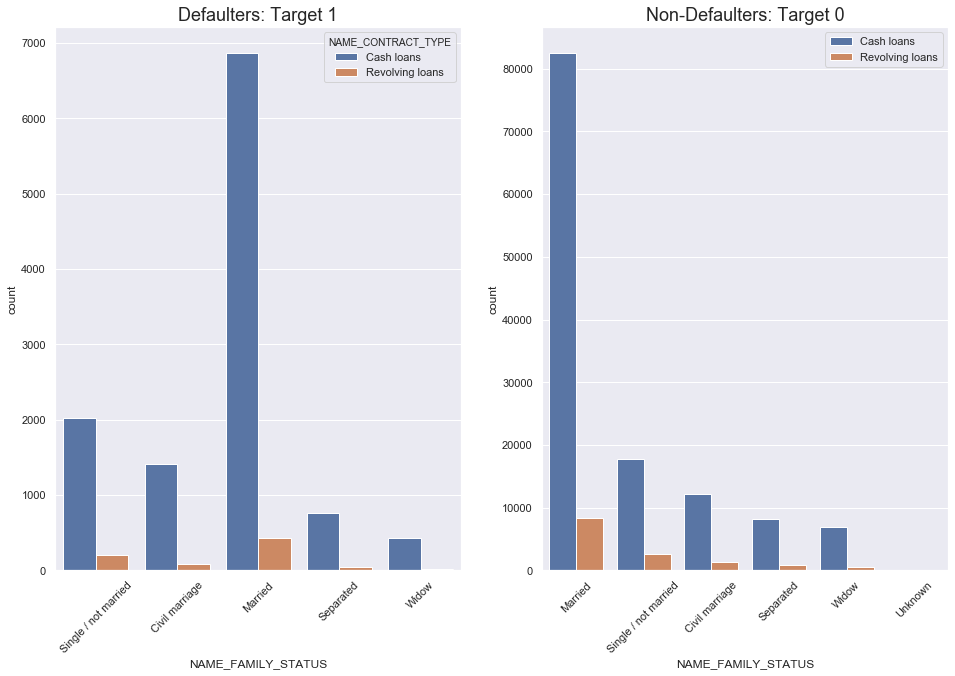

In [192]:
#Analysising Name Family Status and Name Contrat type



plt.figure(figsize = (16, 10))

plt.subplot(1, 2, 1)
sns.countplot(target1_application_data["NAME_FAMILY_STATUS"],hue="NAME_CONTRACT_TYPE",data=target1_application_data)
plt.title("Defaulters: Target 1", fontdict = {'fontsize':18})
plt.xticks(rotation = 45)
plt.subplot(1, 2, 2)
sns.countplot(target0_application_data["NAME_FAMILY_STATUS"],hue="NAME_CONTRACT_TYPE",data=target0_application_data)
plt.title("Non-Defaulters: Target 0", fontdict = {'fontsize':18})
    
plt.xticks(rotation = 45)
plt.legend(loc='upper right')
plt.show()

>In terms of percentage of not repayment of loan, marriage has the highest percent of not repayment for cash loan, with Widow the lowest for cash loan and almost zero for revovling loan

>Separated are having second lowest defaulters withing  cash loan contract type 

>Married has lowest ratio for cash loan defaulter vs revolving loan defaulters

>On contradictory married are also highest for non defaulters within cash loan contract type

#### Occupation Type and Name Contract type

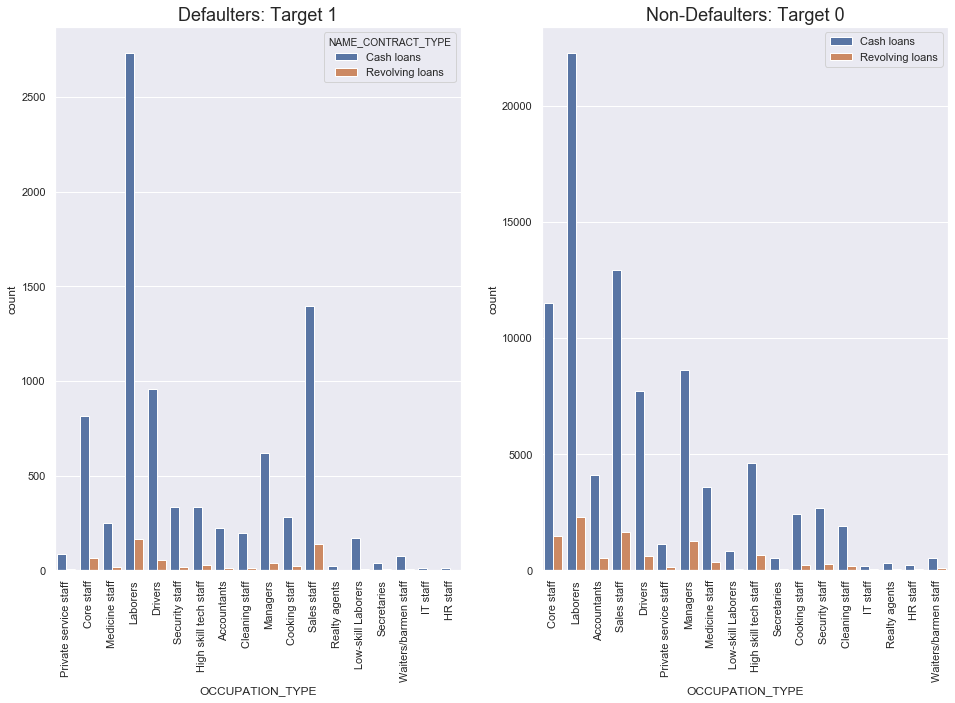

In [193]:
#Analysisng Occupation Type and Name Contract type

plt.figure(figsize = (16, 10))

plt.subplot(1, 2, 1)
sns.countplot(target1_application_data["OCCUPATION_TYPE"],hue="NAME_CONTRACT_TYPE",data=target1_application_data)
plt.title("Defaulters: Target 1", fontdict = {'fontsize':18})
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
sns.countplot(target0_application_data["OCCUPATION_TYPE"],hue="NAME_CONTRACT_TYPE",data=target0_application_data)
plt.title("Non-Defaulters: Target 0", fontdict = {'fontsize':18})
    
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.show()

>The category with highest percent of not repaid loans are Laborers, followed by sales staff,Drivers, core staff, and managers

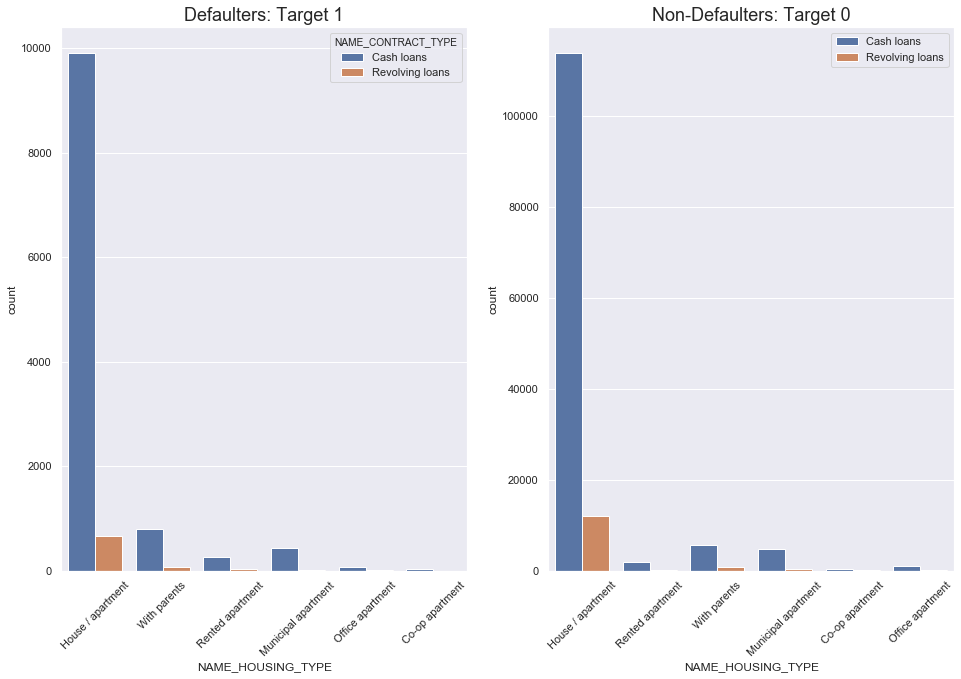

In [194]:

plt.figure(figsize = (16, 10))

plt.subplot(1, 2, 1)
sns.countplot(target1_application_data["NAME_HOUSING_TYPE"],hue="NAME_CONTRACT_TYPE",data=target1_application_data)
plt.title("Defaulters: Target 1", fontdict = {'fontsize':18})
plt.xticks(rotation = 45)
plt.subplot(1, 2, 2)
sns.countplot(target0_application_data["NAME_HOUSING_TYPE"],hue="NAME_CONTRACT_TYPE",data=target0_application_data)
plt.title("Non-Defaulters: Target 0", fontdict = {'fontsize':18})
    
plt.xticks(rotation = 45)
plt.legend(loc='upper right')
plt.show()


> Housed/appartment has the highest numbers of defaulters within in cash loan contract type, co-op apartments are the lowest or almost zero in defaulting for cash or revolving loans then comes office aparments with second most lowest defaulters in cash loan contract type.

>Municipal apartments has almost zero defaulters in revovling loans , same can be said for defaulters living in Rented apartment

### 4. Read Previous Application data and merging with application data

In [195]:
filename = "previous_application.csv"
# Count the number of rows in my file
num_lines = sum(1 for i in open(filename))
# The number of rows that I wanted to load
size = num_lines//2

# Create a random indices between these two numbers

random.seed(10)
skip_id = random.sample(range(1, num_lines), num_lines-size)

In [196]:
prev_data=pd.read_csv(filename,skiprows=skip_id)
prev_data

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0          2523466      122040         Cash loans   15060.7350   
1          2819243      176158         Cash loans   47041.3350   
2          1784265      202054         Cash loans   31924.3950   
3          2367563      342292         Cash loans          nan   
4          2257824      161140         Cash loans   13832.7750   
...            ...         ...                ...          ...   
835101     1556789      209732         Cash loans   22299.3900   
835102     2300464      352015     Consumer loans   14704.2900   
835103     2659632      249544     Consumer loans   11520.8550   
835104     2785582      400317         Cash loans   18821.5200   
835105     2418762      261212         Cash loans   16431.3000   

        AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0           112500.0000 136444.5000               nan      112500.0000   
1           450000.0000 470790.0000               nan      450000.0000   
2           337500.0000 404055.0000               nan      337500.0000   
3                0.0000      0.0000               nan              nan   
4           211500.0000 246397.5000               nan      211500.0000   
...                 ...         ...               ...              ...   
835101      315000.0000 436216.5000               nan      315000.0000   
835102      267295.5000 311400.0000            0.0000      267295.5000   
835103      105237.0000 102523.5000        10525.5000      105237.0000   
835104      180000.0000 191880.0000               nan      180000.0000   
835105      360000.0000 360000.0000               nan      360000.0000   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         TUESDAY                       11   
1                          MONDAY                        7   
2                        THURSDAY                        9   
3                          MONDAY                       15   
4                          FRIDAY                       10   
...                           ...                      ...   
835101                   THURSDAY                       17   
835102                  WEDNESDAY                       12   
835103                     MONDAY                       12   
835104                  WEDNESDAY                        9   
835105                     SUNDAY                       10   

       FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
0                                Y                       1                nan   
1                                Y                       1                nan   
2                                Y                       1                nan   
3                                Y                       1                nan   
4                                Y                       1                nan   
...                            ...                     ...                ...   
835101                           Y                       1                nan   
835102                           Y                       1             0.0000   
835103                           Y                       1             0.1014   
835104                           Y                       1                nan   
835105                           Y                       1                nan   

        RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0                         nan                       nan   
1                         nan                       nan   
2                         nan                       nan   
3                         nan                       nan   
4                         nan                       nan   
...                       ...                       ...   
835101                    nan                       nan   
835102                    nan                       nan   
835103                    nan                       nan   
835104            

In [197]:
#explore the dataset
prev_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [198]:
# get shape of data (rows, columns)
prev_data.shape

(835106, 37)

In [199]:
# get the type of dataset
prev_data.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [200]:
# displaying the informtion of previous application dataset
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835106 entries, 0 to 835105
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   835106 non-null  int64  
 1   SK_ID_CURR                   835106 non-null  int64  
 2   NAME_CONTRACT_TYPE           835106 non-null  object 
 3   AMT_ANNUITY                  648836 non-null  float64
 4   AMT_APPLICATION              835106 non-null  float64
 5   AMT_CREDIT                   835105 non-null  float64
 6   AMT_DOWN_PAYMENT             387276 non-null  float64
 7   AMT_GOODS_PRICE              642316 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   835106 non-null  object 
 9   HOUR_APPR_PROCESS_START      835106 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  835106 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       835106 non-null  int64  
 12  RATE_DOWN_PAYMENT            387276 non-null  float64
 13 

In [201]:
# Deprev_datascribing the previous application dataset
prev_data.describe()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION   AMT_CREDIT  \
count  835106.0000 835106.0000  648836.0000      835106.0000  835105.0000   
mean  1923015.0584 278378.3631   15945.9122      175110.4870  195937.5089   
std    532997.1148 102798.5545   14802.7225      292405.8476  318227.2848   
min   1000004.0000 100002.0000       0.0000           0.0000       0.0000   
25%   1461020.2500 189350.0000    6317.1338       18792.0000   24183.0000   
50%   1923273.5000 278877.5000   11250.0000       71059.5000   80541.0000   
75%   2385097.5000 367510.0000   20637.0000      180071.8875  216144.0000   
max   2845381.0000 456255.0000  418058.1450     6905160.0000 6905160.0000   

       AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count       387276.0000      642316.0000              835106.0000   
mean          6682.1730      227695.6488                  12.4871   
std          20606.5242      314975.8845                   3.3350   
min             -0.9000           0.0000                   0.0000   
25%              0.0000       50839.9875                  10.0000   
50%           1620.0000      112275.0000                  12.0000   
75%           7717.5000      234000.0000                  15.0000   
max        2150100.0000     6905160.0000                  23.0000   

       NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
count             835106.0000        387276.0000              2972.0000   
mean                   0.9965             0.0794                 0.1891   
std                    0.0594             0.1077                 0.0893   
min                    0.0000            -0.0000                 0.0348   
25%                    1.0000             0.0000                 0.1607   
50%                    1.0000             0.0509                 0.1891   
75%                    1.0000             0.1089                 0.1933   
max                    1.0000             0.9807                 0.9029   

       RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  \
count                 2972.0000    835106.0000       835106.0000  648839.0000   
mean                     0.7736      -879.8433          312.6393      16.0528   
std                      0.1010       778.8232         6431.3880      14.5577   
min                      0.3732     -2922.0000           -1.0000       0.0000   
25%                      0.7156     -1298.0000           -1.0000       6.0000   
50%                      0.8351      -581.0000            3.0000      12.0000   
75%                      0.8525      -280.0000           82.0000      24.0000   
max                      0.8673        -1.0000      4000000.0000      84.0000   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count         498552.0000     498552.0000                498552.0000   
mean          342220.2758      13891.5212                 33786.9719   
std            88897.2441      72595.5497                106882.4646   
min            -2921.0000      -2892.0000                 -2801.0000   
25%           365243.0000      -1627.0000                 -1243.0000   
50%           365243.0000       -830.0000                  -360.0000   
75%           365243.0000       -410.0000                   131.0000   
max           365243.0000     365243.0000                365243.0000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count    498552.0000       498552.0000                498552.0000  
mean      76771.0691        82130.0959                     0.3330  
std      149780.7660       153393.5479                     0.4713  
min       -2885.0000        -2847.0000                     0.0000  
25%       -1314.0000        -1270.0000                     0.0000  
50%        -536.0000         -498.0000                     0.0000  
75%         -73.0000          -43.0000                     1.0000  
max      365243.0000       365243.0000                     1.0000

In [202]:
# Finding percentage of null values columns
NA_col_pre = column_wise_null_percentage(prev_data)

In [203]:
# identify columns only with null values
NA_col_pre = NA_col_pre[NA_col_pre>0]
NA_col_pre

AMT_ANNUITY                 22.3000
AMT_DOWN_PAYMENT            53.6300
AMT_GOODS_PRICE             23.0900
RATE_DOWN_PAYMENT           53.6300
RATE_INTEREST_PRIMARY       99.6400
RATE_INTEREST_PRIVILEGED    99.6400
NAME_TYPE_SUITE             49.1000
CNT_PAYMENT                 22.3000
PRODUCT_COMBINATION          0.0200
DAYS_FIRST_DRAWING          40.3000
DAYS_FIRST_DUE              40.3000
DAYS_LAST_DUE_1ST_VERSION   40.3000
DAYS_LAST_DUE               40.3000
DAYS_TERMINATION            40.3000
NFLAG_INSURED_ON_APPROVAL   40.3000
dtype: float64

In [204]:
# Get the column with null values more than 50%
NA_col_pre = NA_col_pre[NA_col_pre>50]
print("Number of columns having null value more than 50% :", len(NA_col_pre.index))
print(NA_col_pre)

Number of columns having null value more than 50% : 4
AMT_DOWN_PAYMENT           53.6300
RATE_DOWN_PAYMENT          53.6300
RATE_INTEREST_PRIMARY      99.6400
RATE_INTEREST_PRIVILEGED   99.6400
dtype: float64


In [205]:
prev_data.shape

(835106, 37)

In [206]:
# Merging the Application dataset with previous appliaction dataset

df_comb = pd.merge(left=application_data,right=prev_data,how='inner',on='SK_ID_CURR',suffixes='_x')
df_comb.shape

(353445, 75)

In [207]:
df_comb.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_ CODE_GENDER FLAG_OWN_CAR  \
0      100008       0          Cash loans           M            N   
1      100008       0          Cash loans           M            N   
2      100008       0          Cash loans           M            N   
3      100008       0          Cash loans           M            N   
4      100019       0          Cash loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY_  \
0               Y             0        99000.0000  490495.5000    27517.5000   
1               Y             0        99000.0000  490495.5000    27517.5000   
2               Y             0        99000.0000  490495.5000    27517.5000   
3               Y             0        99000.0000  490495.5000    27517.5000   
4               Y             0       157500.0000  299772.0000    20160.0000   

   AMT_GOODS_PRICE_ NAME_TYPE_SUITE_ NAME_INCOME_TYPE  \
0       454500.0000  Spouse, partner    State servant   
1       454500.0000  Spouse, partner    State servant   
2       454500.0000  Spouse, partner    State servant   
3       454500.0000  Spouse, partner    State servant   
4       247500.0000           Family          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special               Married  House / apartment   
1  Secondary / secondary special               Married  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special               Married  House / apartment   
4  Secondary / secondary special  Single / not married   Rented apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0358       16941           1588          4970.0000   
1                      0.0358       16941           1588          4970.0000   
2                      0.0358       16941           1588          4970.0000   
3                      0.0358       16941           1588          4970.0000   
4                      0.0207        8728           1157          3494.0000   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START_  \
0              477        Laborers                   WEDNESDAY   
1              477        Laborers                   WEDNESDAY   
2              477        Laborers                   WEDNESDAY   
3              477        Laborers                   WEDNESDAY   
4             1368        Laborers                    SATURDAY   

   HOUR_APPR_PROCESS_START_  REG_REGION_NOT_LIVE_REGION  \
0                        16                           0   
1                        16                           0   
2                        16                           0   
3                        16                           0   
4                         6                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       1                       1                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0                   Other        0.3542        0.6212   
1                   Other        0.3542        0.6212   
2                   Other        0.3542        0.6212  

In [208]:

df_comb = df_comb.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [209]:
# Removing unwanted columns from cmbined df for analysis

df_comb.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [210]:
target0_combine=df_comb.loc[df_comb["TARGET"]==0]
target1_combine=df_comb.loc[df_comb["TARGET"]==1]

In [211]:
target0_combine.shape

(323403, 62)

In [212]:
target1_combine.shape

(30042, 62)

In [213]:
target0_combine.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       0         Cash loans           M            N               Y   
1       0         Cash loans           M            N               Y   
2       0         Cash loans           M            N               Y   
3       0         Cash loans           M            N               Y   
4       0         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE_  \
0             0        99000.0000 490495.5000   27517.5000       454500.0000   
1             0        99000.0000 490495.5000   27517.5000       454500.0000   
2             0        99000.0000 490495.5000   27517.5000       454500.0000   
3             0        99000.0000 490495.5000   27517.5000       454500.0000   
4             0       157500.0000 299772.0000   20160.0000       247500.0000   

  NAME_TYPE_SUITE_ NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0  Spouse, partner    State servant  Secondary / secondary special   
1  Spouse, partner    State servant  Secondary / secondary special   
2  Spouse, partner    State servant  Secondary / secondary special   
3  Spouse, partner    State servant  Secondary / secondary special   
4           Family          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0               Married  House / apartment                      0.0358   
1               Married  House / apartment                      0.0358   
2               Married  House / apartment                      0.0358   
3               Married  House / apartment                      0.0358   
4  Single / not married   Rented apartment                      0.0207   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       16941           1588          4970.0000              477   
1       16941           1588          4970.0000              477   
2       16941           1588          4970.0000              477   
3       16941           1588          4970.0000              477   
4        8728           1157          3494.0000             1368   

  OCCUPATION_TYPE       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0        Laborers                   Other        0.3542        0.6212   
1        Laborers                   Other        0.3542        0.6212   
2        Laborers                   Other        0.3542        0.6212   
3        Laborers                   Other        0.3542        0.6212   
4        Laborers  Business Entity Type 2        0.3466        0.6786   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                    0.0000                    0.0000               2536.0000   
1                    0.0000                    0.0000               2536.0000   
2                    0.0000                    0.0000               2536.0000   
3                    0.0000                    0.0000               2536.0000   
4                    0.0000                    0.0000                925.0000   

   AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE  SK_ID_PREV  \
0                      1.0000     75000,100000    450000-500000     2218188   
1                      1.0000     75000,100000    450000-500000     1757431   
2                      1.0000     75000,100000    450000-500000     1186888   
3                      1.0000     75000,100000    450000-500000     2613879   
4                      1.0000    150000-175000    250000-300000     1620327   

  NAME_CONTRACT_TYPE_PREV  AMT_ANNUITY_PREV  AMT_APPLICATION  AMT_CREDIT_PREV  \
0          Consumer loans        17885.8350      162598.5000      162598.5000   
1              Cash loans               nan           0.0000           0.0000   
2          Consumer loans         8019.0900       44455.5000       39955.5000   
3              Cash loans        25309.5750      450000.0000      501975.0000   
4 

In [214]:
target1_combine.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
158       1         Cash loans           F            N               Y   
159       1         Cash loans           F            N               Y   
160       1         Cash loans           F            N               Y   
161       1         Cash loans           F            N               Y   
162       1         Cash loans           F            N               Y   

     CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
158             0       157500.0000 245619.0000   12667.5000   
159             0       157500.0000 245619.0000   12667.5000   
160             0       157500.0000 245619.0000   12667.5000   
161             0       157500.0000 245619.0000   12667.5000   
162             0       157500.0000 245619.0000   12667.5000   

     AMT_GOODS_PRICE_ NAME_TYPE_SUITE_ NAME_INCOME_TYPE  \
158       166500.0000    Unaccompanied          Working   
159       166500.0000    Unaccompanied          Working   
160       166500.0000    Unaccompanied          Working   
161       166500.0000    Unaccompanied          Working   
162       166500.0000    Unaccompanied          Working   

               NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
158  Secondary / secondary special  Single / not married  House / apartment   
159  Secondary / secondary special  Single / not married  House / apartment   
160  Secondary / secondary special  Single / not married  House / apartment   
161  Secondary / secondary special  Single / not married  House / apartment   
162  Secondary / secondary special  Single / not married  House / apartment   

     REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
158                      0.0226       17538           7676           774.0000   
159                      0.0226       17538           7676           774.0000   
160                      0.0226       17538           7676           774.0000   
161                      0.0226       17538           7676           774.0000   
162                      0.0226       17538           7676           774.0000   

     DAYS_ID_PUBLISH        OCCUPATION_TYPE       ORGANIZATION_TYPE  \
158             1082  Private service staff  Business Entity Type 3   
159             1082  Private service staff  Business Entity Type 3   
160             1082  Private service staff  Business Entity Type 3   
161             1082  Private service staff  Business Entity Type 3   
162             1082  Private service staff  Business Entity Type 3   

     EXT_SOURCE_2  EXT_SOURCE_3  OBS_60_CNT_SOCIAL_CIRCLE  \
158        0.1822        0.4436                    0.0000   
159        0.1822        0.4436                    0.0000   
160        0.1822        0.4436                    0.0000   
161        0.1822        0.4436                    0.0000   
162        0.1822        0.4436                    0.0000   

     DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
158                    0.0000                216.0000   
159                    0.0000                216.0000   
160                    0.0000                216.0000   
161                    0.0000                216.0000   
162                    0.0000                216.0000   

     AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE  SK_ID_PREV  \
158                      6.0000    150000-175000    200000-250000     1335039   
159                      6.0000    150000-175000    200000-250000     1427327   
160                      6.0000    150000-175000    200000-250000     1092385   
161                      6.0000    150000-175000    200000-250000     1736208   
162                      6.0000    150000-175000    200000-250000     1638068   

    NAME_CONTRACT_TYPE_PREV  AMT_ANNUITY_PREV  AMT_APPLICATION  \
158              Cash loans        20992.5900      675000.0000   
159              Cash loans               nan           0.0000   
160              Cash loans   

## Univariate and Bivariate Analysis

Univariate:
- Continuous Variable
- Categorical Variable

Bivariate Anlysis:
- Continuous-Continuous
- Continuous-Categorical
- Categorical-Categorical

<h3>A. Categorical Variable</h3>

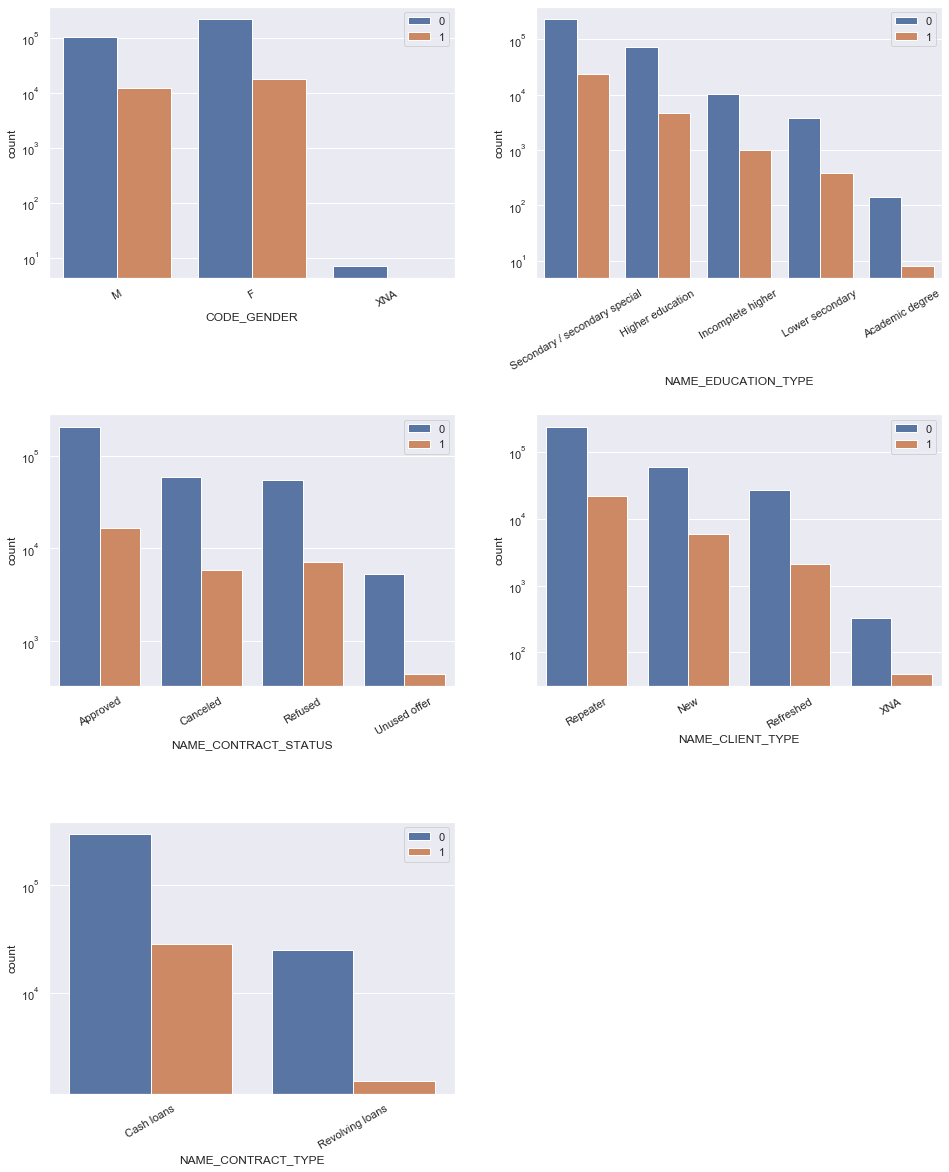

In [215]:
features = ['CODE_GENDER', "NAME_EDUCATION_TYPE","NAME_CONTRACT_STATUS","NAME_CLIENT_TYPE","NAME_CONTRACT_TYPE"]
plt.figure(figsize = (16, 20))

for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = df_comb)
    
    plt.rcParams['axes.titlesize'] = 10
    
    plt.xticks(rotation = 30)
    plt.legend(loc='upper right')
    plt.yscale('log')

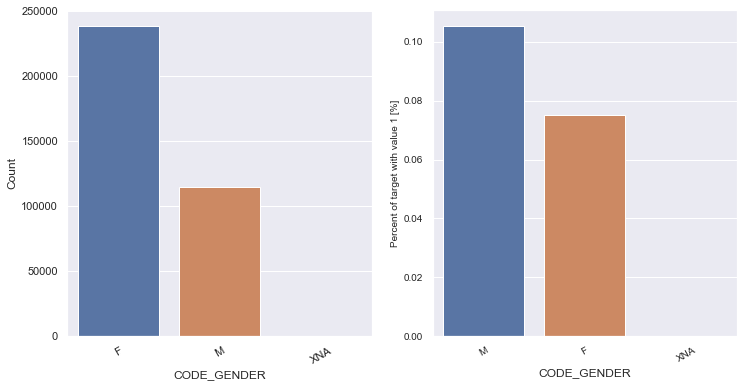

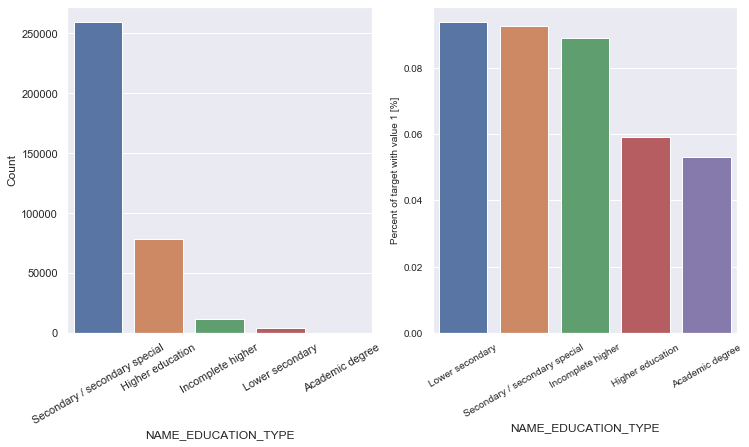

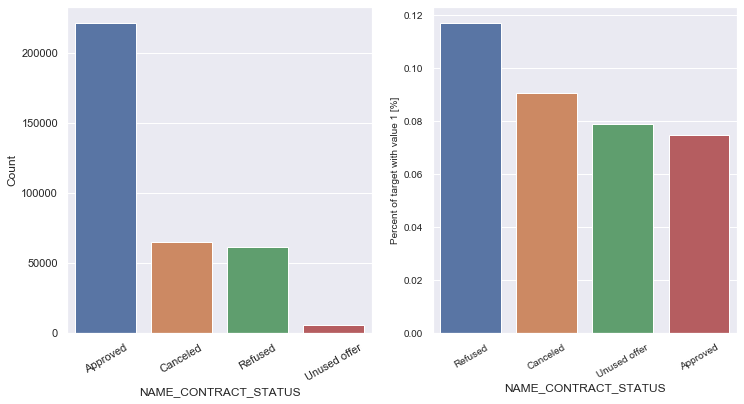

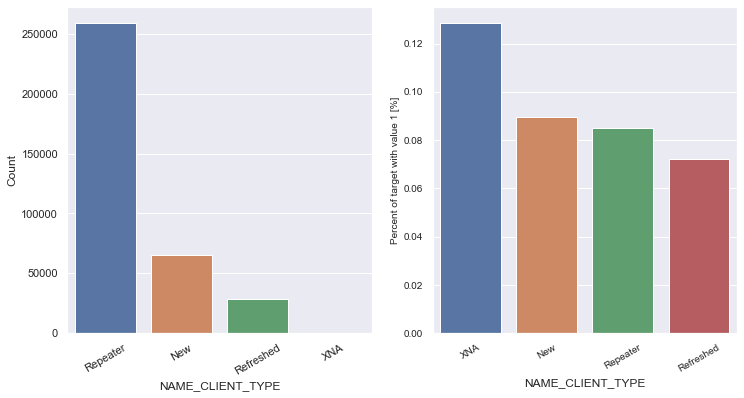

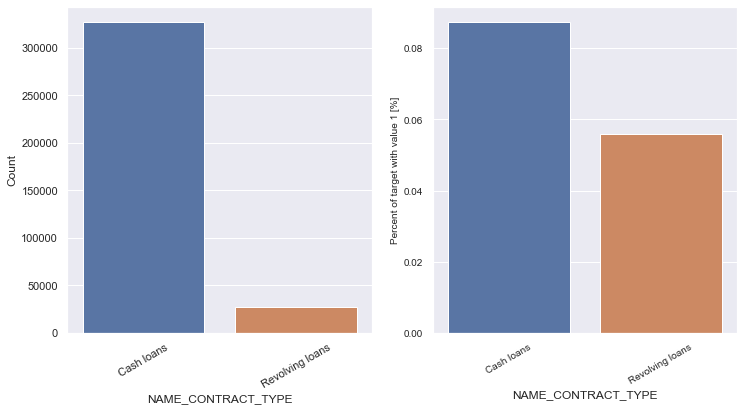

In [216]:
features = ['CODE_GENDER', "NAME_EDUCATION_TYPE","NAME_CONTRACT_STATUS","NAME_CLIENT_TYPE","NAME_CONTRACT_TYPE"]
for i in features:
    plot_stats(i,True,True)

<h4>From the above two plots we can make the following inferences:</h4>

CODE_GENDER:

* Although the number of Female applying for loan is more but it can be observed that percent of defaulters are more in Male than Female.

NAME_EDUCATION_TYPE

* Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.

* It can be clearly observed that the Lower secondary category, although rare, have the largest rate of not returning the loan. Whereas people with Academic degree have the least defaulter rate.

NAME_CONTRACT_STATUS

* It can be observed that percent of defaults is highest for clients who Refused the loan, followed by clients who Canceled the loan offer, Unused offer and Approved (lowest default percentage)

NAME_CLIENT_TYPE

* It can be observed that percent of defaults is highest for clients who are New clients, followed by clients who are Repeater and least are the clients who refereshed, percent of defaults ranging from from 8.5%, 8.25% and 7% respectivelly

NAME_CONTRACT_TYPE

* It can be observed that clients who took Cash loan tend to default compared to the clients who opted for Revolving loan type.

<h3>B. Continuous Variables</h3>

#### a. Exterior Source

In [217]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = df_comb[['TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.0000       -0.1524       -0.1875     -0.0797
EXT_SOURCE_2 -0.1524        1.0000        0.1093      0.0893
EXT_SOURCE_3 -0.1875        0.1093        1.0000      0.1899
DAYS_BIRTH   -0.0797        0.0893        0.1899      1.0000

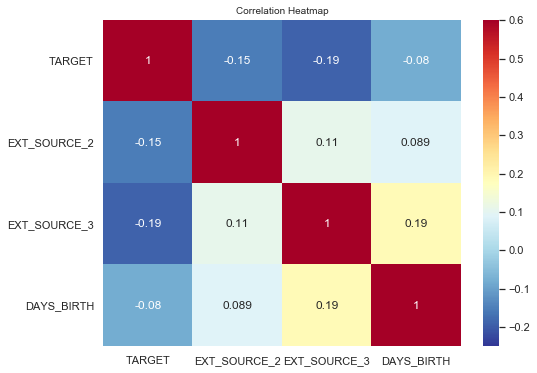

In [218]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

* EXT_SOURCE has negative correlation with the target, meaning that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. 

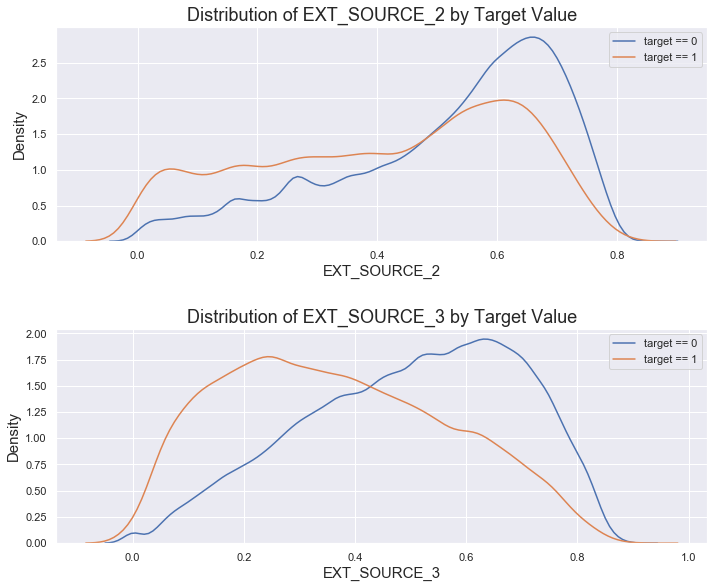

In [219]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df_comb.loc[df_comb['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df_comb.loc[df_comb['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source,fontdict = {'fontsize':18})
    plt.xlabel('%s' % source,fontdict = {'fontsize':15}); 
    plt.ylabel('Density',fontdict = {'fontsize':15});
    
plt.tight_layout(h_pad = 2.5)

* EXT_SOURCE_3 displays the greatest difference between the values of the target. 
* It can be clearly observed that with small value of EXT_SOURCE_3 higher is the defaulter rate. And as the EXT_SOURCE_3 value increases the rate of client becoming defaulter decreases.

<h4>b. Impact of Age on repayment</h4>

In [220]:
# Find the correlation of the positive days since birth and target
df_comb['DAYS_BIRTH'] = abs(df_comb['DAYS_BIRTH'])
df_comb['DAYS_BIRTH'].corr(df_comb['TARGET'])

-0.07972256408749354

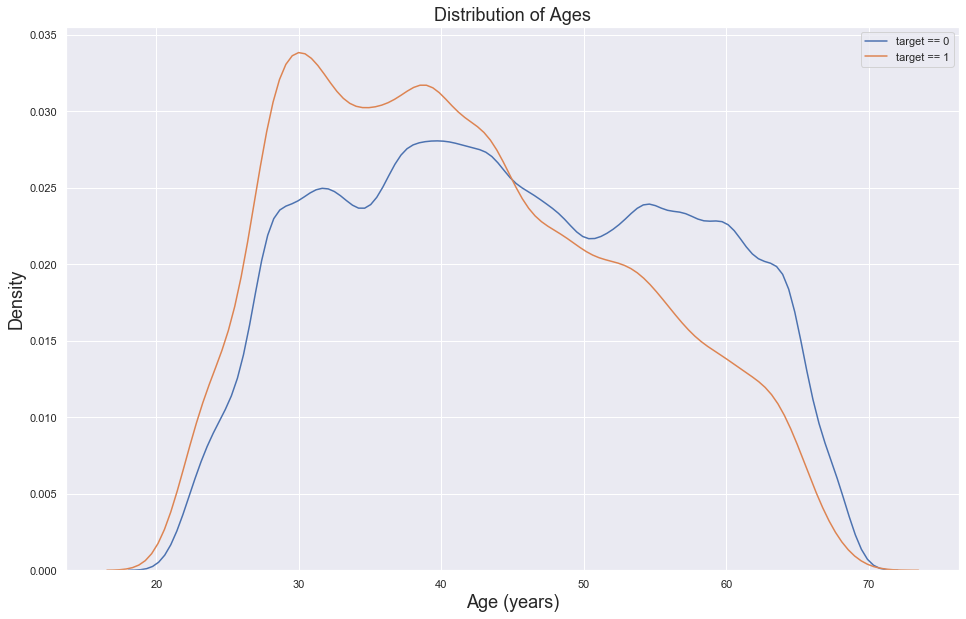

In [221]:
plt.figure(figsize = (16, 10))

# KDE plot of loans that were repaid on time
sns.kdeplot(df_comb.loc[df_comb['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_comb.loc[df_comb['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')
# Labeling of plot
plt.xlabel('Age (years)',fontdict = {'fontsize':18}); 
plt.ylabel('Density',fontdict = {'fontsize':18}); 
plt.title('Distribution of Ages',fontdict = {'fontsize':18});


Age is having negative linear relationship with the target means as the client gets older they tend to repay their loans on time more often. However, younger clients tend to default the most.

<h4>c. 'DAYS_ID_PUBLISH' &'DAYS_EMPLOYED'</h4>

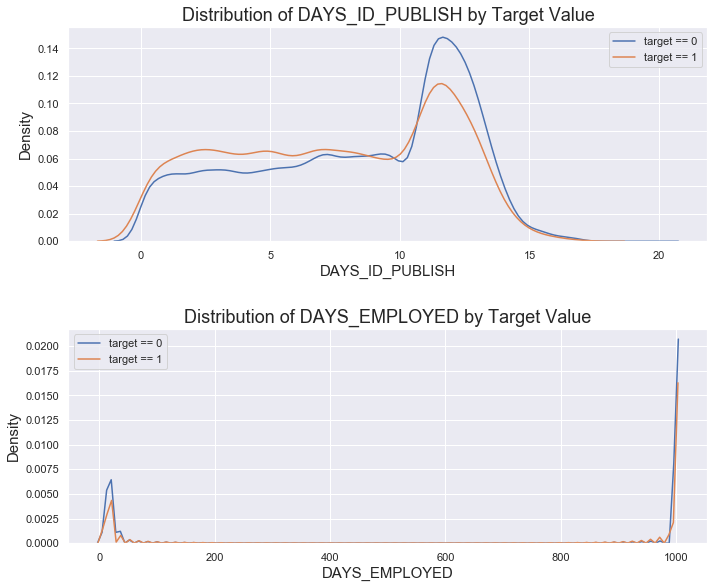

In [222]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['DAYS_ID_PUBLISH', 'DAYS_EMPLOYED']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df_comb.loc[df_comb['TARGET'] == 0, source]/365, label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df_comb.loc[df_comb['TARGET'] == 1, source]/365, label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source,fontdict = {'fontsize':18})
    plt.xlabel('%s' % source,fontdict = {'fontsize':15});
    plt.ylabel('Density',fontdict = {'fontsize':15});
    
plt.tight_layout(h_pad = 2.5)

DAYS_ID_PUBLISH :How many days before the application did client change the identity document with which he applied for the loan

* Although the data is imbalance but we can clearly observe that clients who has recently change the identity documents before applying for Loan are defaulting to replay the loan amount.

DAYS_EMPLOYED

* The maximum value is about 1000 years. Which confirms that DAYS_EMPLOYED has an anomaly. Also, we cannot say much for customers who are employed from 0 -100 years as both the defaulters and non-defaulters are showing peak for people having less experience.

<h3>Correlation matrix for Defaulters and Non-Defaulters</h3>

In [223]:
corr = target1_combine.corr()
corr_target1 = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_target1 = corr_target1.unstack().reset_index().dropna(subset = [0])
corr_target1.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_target1['Corr_abs'] = abs(corr_target1['Correlation_Value'])
corr_target1.sort_values(by = "Corr_abs", ascending =False, inplace = True)

In [224]:
# Top 10 correlated variables: target 1 dataframe

corr_target1.head(10)

VAR1                VAR2  Correlation_Value  \
789            AMT_GOODS_PRICEx     AMT_APPLICATION             0.9995   
790            AMT_GOODS_PRICEx     AMT_CREDIT_PREV             0.9923   
178            AMT_GOODS_PRICE_          AMT_CREDIT             0.9826   
719             AMT_CREDIT_PREV     AMT_APPLICATION             0.9753   
1187           DAYS_TERMINATION       DAYS_LAST_DUE             0.9414   
1114  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING            -0.8821   
718             AMT_CREDIT_PREV    AMT_ANNUITY_PREV             0.8366   
788            AMT_GOODS_PRICEx    AMT_ANNUITY_PREV             0.8364   
683             AMT_APPLICATION    AMT_ANNUITY_PREV             0.8220   
179            AMT_GOODS_PRICE_         AMT_ANNUITY             0.7412   

      Corr_abs  
789     0.9995  
790     0.9923  
178     0.9826  
719     0.9753  
1187    0.9414  
1114    0.8821  
718     0.8366  
788     0.8364  
683     0.8220  
179     0.7412

In [225]:
corr = target0_combine.corr()
corr_target0 = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_target0 = corr_target0.unstack().reset_index().dropna(subset = [0])
corr_target0.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_target0['Corr_abs'] = abs(corr_target0['Correlation_Value'])
corr_target0.sort_values(by = "Corr_abs", ascending =False, inplace = True)

In [226]:
# Top 10 correlated variables: target 0 dataaframe

corr_target0.head(10)

VAR1                VAR2  Correlation_Value  \
789            AMT_GOODS_PRICEx     AMT_APPLICATION             0.9999   
790            AMT_GOODS_PRICEx     AMT_CREDIT_PREV             0.9934   
178            AMT_GOODS_PRICE_          AMT_CREDIT             0.9865   
719             AMT_CREDIT_PREV     AMT_APPLICATION             0.9756   
1187           DAYS_TERMINATION       DAYS_LAST_DUE             0.9262   
788            AMT_GOODS_PRICEx    AMT_ANNUITY_PREV             0.8191   
718             AMT_CREDIT_PREV    AMT_ANNUITY_PREV             0.8147   
683             AMT_APPLICATION    AMT_ANNUITY_PREV             0.8070   
1114  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING            -0.8005   
179            AMT_GOODS_PRICE_         AMT_ANNUITY             0.7643   

      Corr_abs  
789     0.9999  
790     0.9934  
178     0.9865  
719     0.9756  
1187    0.9262  
788     0.8191  
718     0.8147  
683     0.8070  
1114    0.8005  
179     0.7643

<h2>Bivarite Analysis</h2>

<h3>A. Continuous-Continuous</h3>

<h3>AMT_GOODS_PRICE vs AMT_APPLICATION</h3>

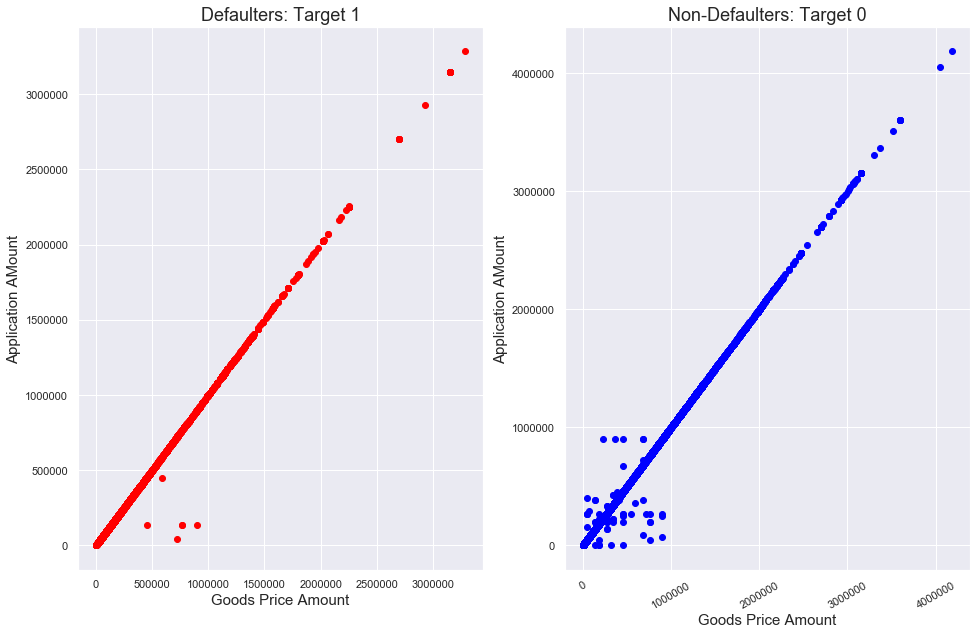

In [227]:
plt.figure(figsize = (16, 10))

plt.subplot(1, 2, 1)
plt.scatter(target1_combine["AMT_GOODS_PRICEx"],target1_combine["AMT_APPLICATION"],c="red")
plt.title("Defaulters: Target 1", fontdict = {'fontsize':18})
plt.xlabel("Goods Price Amount",fontdict = {'fontsize':15})
plt.ylabel("Application AMount",fontdict = {'fontsize':15})
plt.subplot(1, 2, 2)
plt.scatter(target0_combine["AMT_GOODS_PRICEx"],target0_combine["AMT_APPLICATION"],c="blue")
plt.title("Non-Defaulters: Target 0", fontdict = {'fontsize':18})
plt.xlabel("Goods Price Amount",fontdict = {'fontsize':15})
plt.ylabel("Application AMount",fontdict = {'fontsize':15})
    
plt.xticks(rotation = 30)
plt.show()

It can be observed that Goods price amount is positively correlated with the Application amount, meaning the application amount i.e. amount asked by client for the loan depends on the amount of goods for which client has applied. If the goods price is high then client will apply for higher amount of loan or vice versa.

<h3>AMT_GOODS_PRICEx vs AMT_CREDIT_PREV</h3>

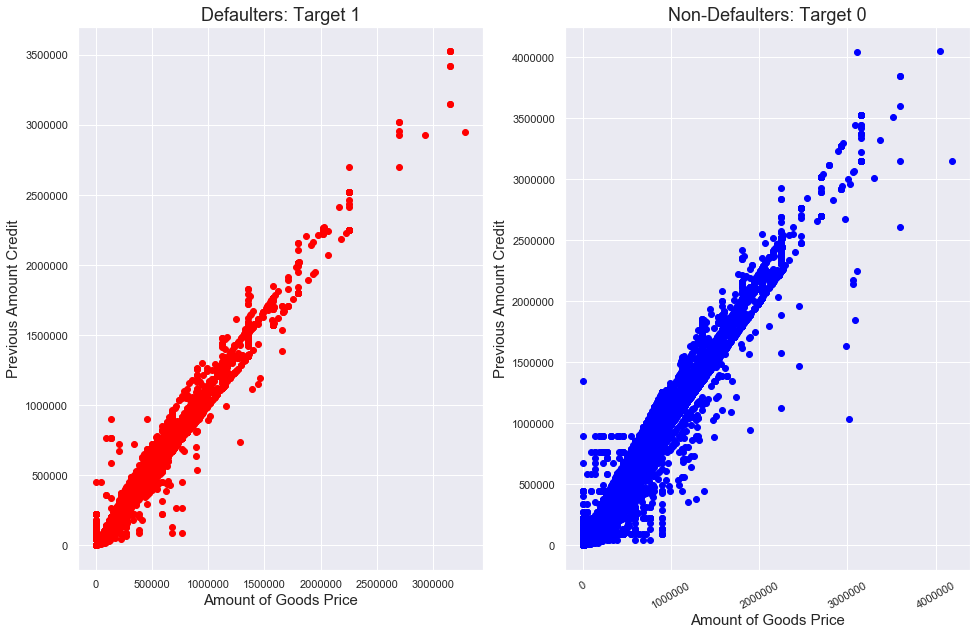

In [228]:
plt.figure(figsize = (16, 10))

plt.subplot(1, 2, 1)
plt.scatter(target1_combine["AMT_GOODS_PRICEx"],target1_combine["AMT_CREDIT_PREV"],c="red")
plt.title("Defaulters: Target 1", fontdict = {'fontsize':18})
plt.xlabel("Amount of Goods Price",fontdict = {'fontsize':15})
plt.ylabel("Previous Amount Credit",fontdict = {'fontsize':15})
plt.subplot(1, 2, 2)
plt.scatter(target0_combine["AMT_GOODS_PRICEx"],target0_combine["AMT_CREDIT_PREV"],c="blue")
plt.title("Non-Defaulters: Target 0", fontdict = {'fontsize':18})
plt.xlabel("Amount of Goods Price",fontdict = {'fontsize':15})
plt.ylabel("Previous Amount Credit",fontdict = {'fontsize':15})
    
plt.xticks(rotation = 30)
plt.show()

It can be observed that Goods price amount is positively correlated with the Previous amount credit, meaning the amount credited depends on the amount of goods for which client applied for loan.

<h3>AMT_CREDIT_PREV vs AMT_APPLICATION</h3>

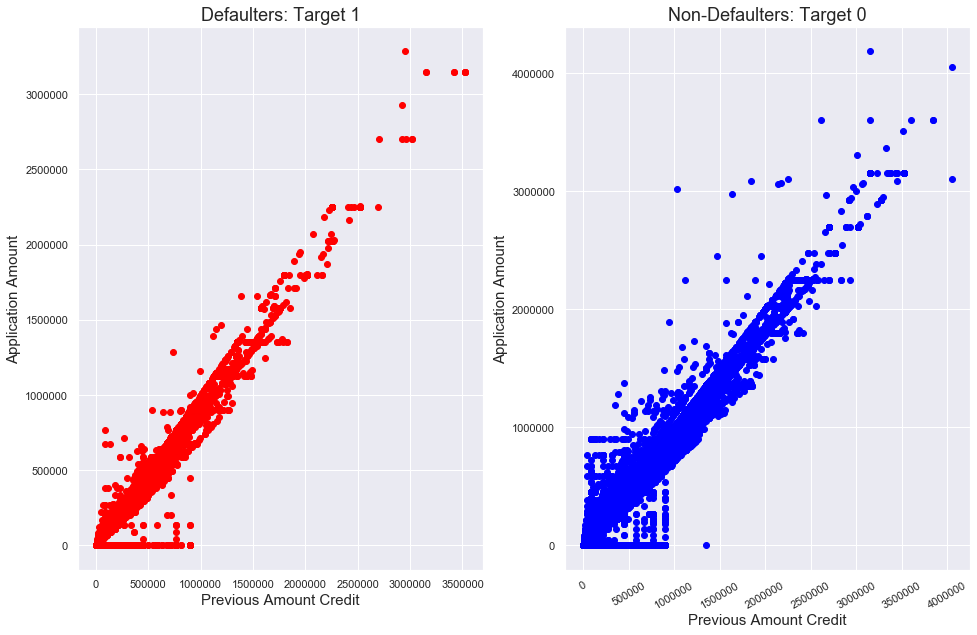

In [229]:
plt.figure(figsize = (16, 10))

plt.subplot(1, 2, 1)
plt.scatter(target1_combine["AMT_CREDIT_PREV"],target1_combine["AMT_APPLICATION"],c="red")
plt.title("Defaulters: Target 1", fontdict = {'fontsize':18})
plt.xlabel("Previous Amount Credit",fontdict = {'fontsize':15})
plt.ylabel("Application Amount",fontdict = {'fontsize':15})
plt.subplot(1, 2, 2)
plt.scatter(target0_combine["AMT_CREDIT_PREV"],target0_combine["AMT_APPLICATION"],c="blue")
plt.title("Non-Defaulters: Target 0", fontdict = {'fontsize':18})
plt.xlabel("Previous Amount Credit",fontdict = {'fontsize':15})
plt.ylabel("Application Amount",fontdict = {'fontsize':15})
    
plt.xticks(rotation = 30)
plt.show()

* It can be observed that Amount credited is positively correlated with the application amount, meaning after the previous loan got approved bank credited some amount i.e. Previous amount credit it depends on the amount that client applied intially i.e. Application amount. 
* If client has applied for higher amount of loan then bank will credit approximately same amount of loan or less amount. So, there is high correlation between these two fields

<h3>B. Categorical-Categorical</h3>

<h4>NAME_CONTRACT_TYPE vs CODE_GENDER</h4>

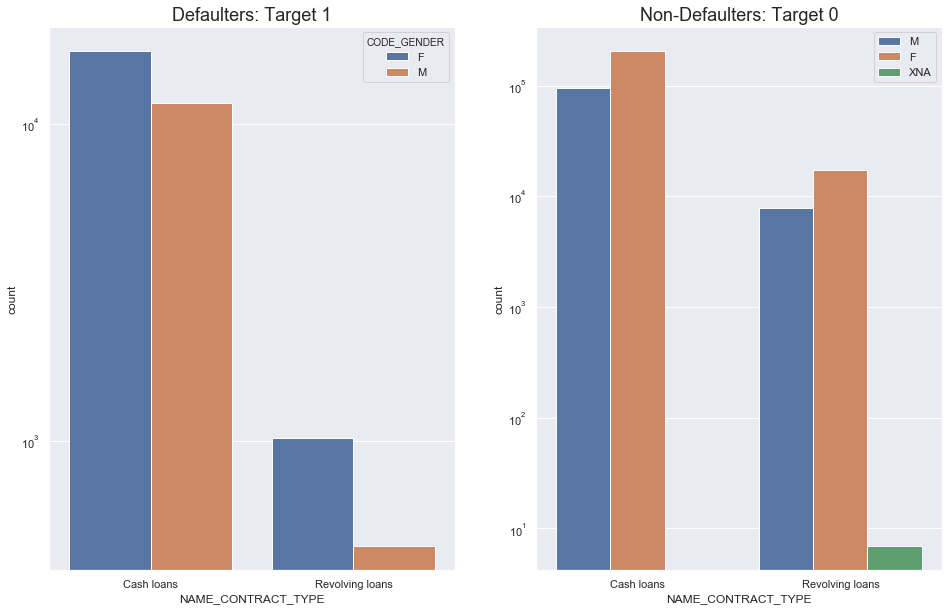

In [230]:
plt.figure(figsize = (16, 10))

plt.subplot(1, 2, 1)
sns.countplot(target1_combine["NAME_CONTRACT_TYPE"],hue="CODE_GENDER",data=target1_combine)
plt.title("Defaulters: Target 1", fontdict = {'fontsize':18})
plt.yscale('log')

plt.subplot(1, 2, 2)
sns.countplot(target0_combine["NAME_CONTRACT_TYPE"],hue="CODE_GENDER",data=target0_combine)
plt.title("Non-Defaulters: Target 0", fontdict = {'fontsize':18})
    
plt.xticks(rotation = 0)
plt.legend(loc='upper right')
plt.yscale('log')

plt.show()

NAME_CONTRACT_TYPE

* For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.

* From the above graphs we can see that the Male clients who applied for Cash Loan are major defaulter.

<h4>FLAG_OWN_CAR vs CODE_GENDER</h4>

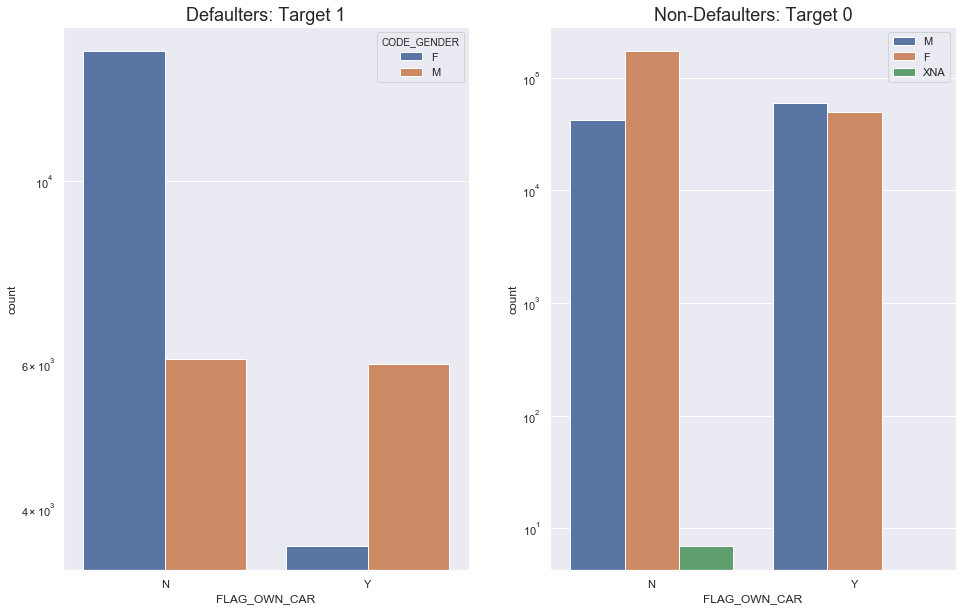

In [231]:
plt.figure(figsize = (16, 10))

plt.subplot(1, 2, 1)
sns.countplot(target1_combine["FLAG_OWN_CAR"],hue="CODE_GENDER",data=target1_combine,)
plt.title("Defaulters: Target 1", fontdict = {'fontsize':18})
plt.yscale('log')

plt.subplot(1, 2, 2)
sns.countplot(target0_combine["FLAG_OWN_CAR"],hue="CODE_GENDER",data=target0_combine)
plt.title("Non-Defaulters: Target 0", fontdict = {'fontsize':18})
plt.yscale('log')    
plt.xticks(rotation = 0)
plt.legend(loc='upper right')
plt.show()

FLAG_OWN_CAR

* The person who doesn't own a car is having higher percentage of defaulter.
* From the above graphs we can see that the Female who doesn't own a car has high percentage of defaulting for the loan repayment.

<h4>NAME_FAMILY_STATUS vs CODE_GENDER</h4>

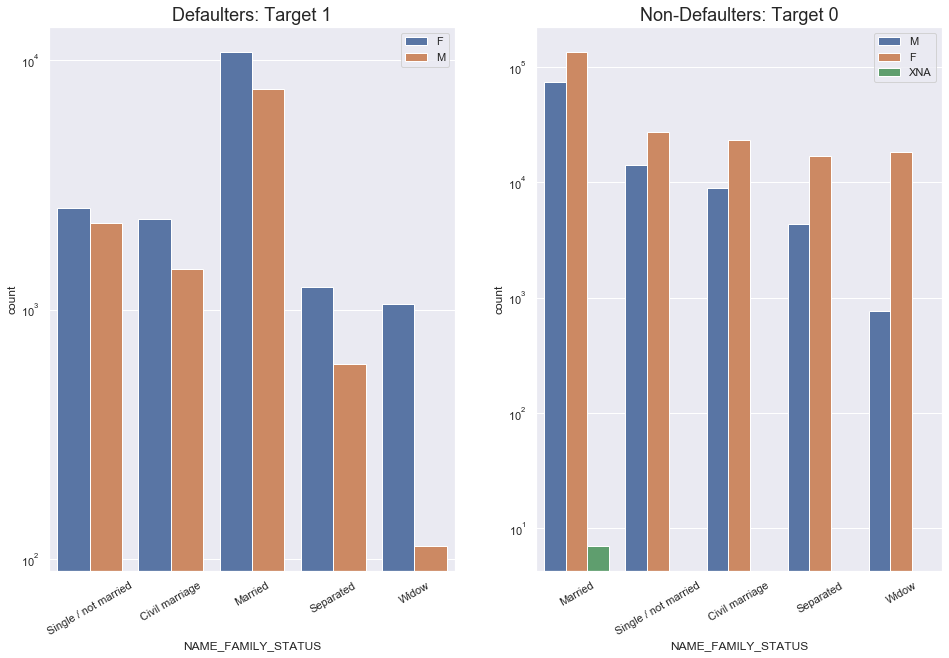

In [232]:
plt.figure(figsize = (16, 10))

plt.subplot(1, 2, 1)
sns.countplot(target1_combine["NAME_FAMILY_STATUS"],hue="CODE_GENDER",data=target1_combine)
plt.title("Defaulters: Target 1", fontdict = {'fontsize':18})
plt.yscale('log')
plt.xticks(rotation = 30)
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
sns.countplot(target0_combine["NAME_FAMILY_STATUS"],hue="CODE_GENDER",data=target0_combine)
plt.title("Non-Defaulters: Target 0", fontdict = {'fontsize':18})
plt.yscale('log')    
plt.xticks(rotation = 30)
plt.legend(loc='upper right')
plt.show()

Male Married clients has the highest defaulting percentage compared to other family status.
On the other hand Female widow has highest defaulting percentage compared to Male widow 

<h3>C. Continuous-Categorical</h3>

<h4>a. Gender w.r.t. Prev amount Credited & Income Type</h4>

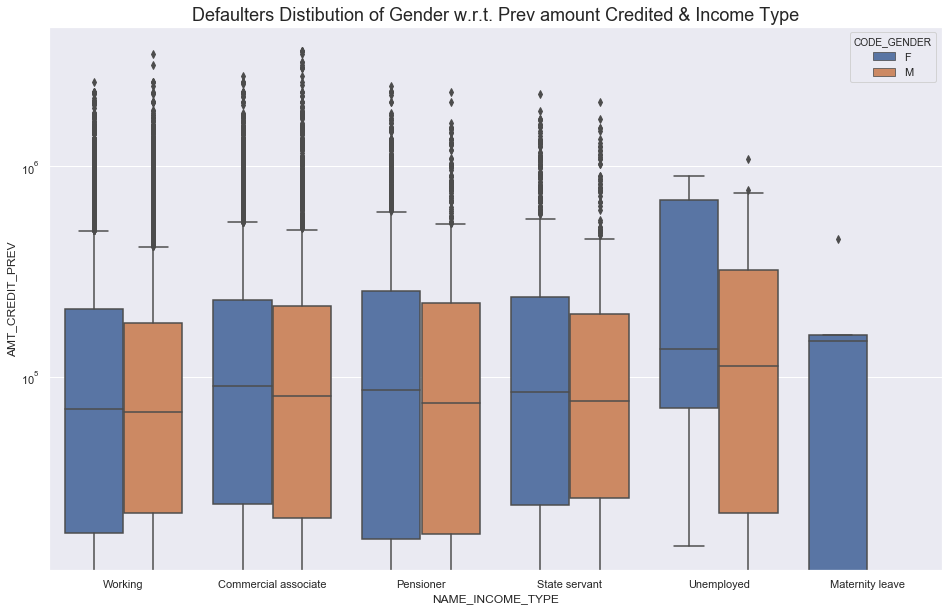

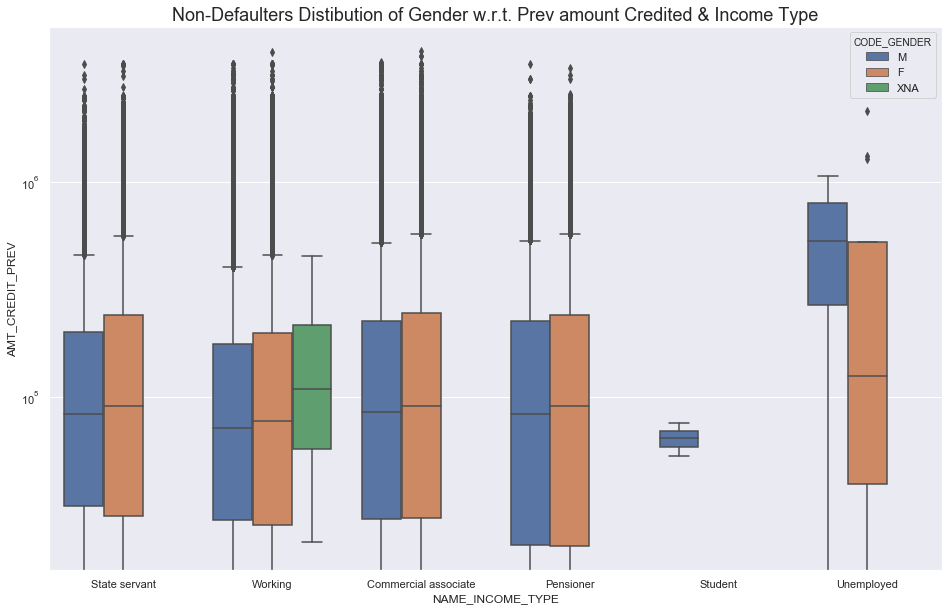

In [233]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16, 10))
sns.boxplot(data =target1_combine, x='NAME_INCOME_TYPE',hue='CODE_GENDER',y='AMT_CREDIT_PREV',orient='v')
plt.title('Defaulters Distibution of Gender w.r.t. Prev amount Credited & Income Type', fontdict = {'fontsize':18})
plt.yscale('log')    
plt.show()

plt.figure(figsize=(16, 10))
sns.boxplot(data =target0_combine, x='NAME_INCOME_TYPE',hue='CODE_GENDER',y='AMT_CREDIT_PREV',orient='v')
plt.title('Non-Defaulters Distibution of Gender w.r.t. Prev amount Credited & Income Type', fontdict = {'fontsize':18})
plt.yscale('log')    
plt.show()

From the above we can conclude some points-

* Maternity category- FEMALE is significantly higher problem in replayement.
* Unemployed Female catgeory also shows more defaulting rate.
* Also, Commercial Associate and Working has the many outliers.


<h4>Family Status w.r.t. Prev amount Credited & Education Type</h4>

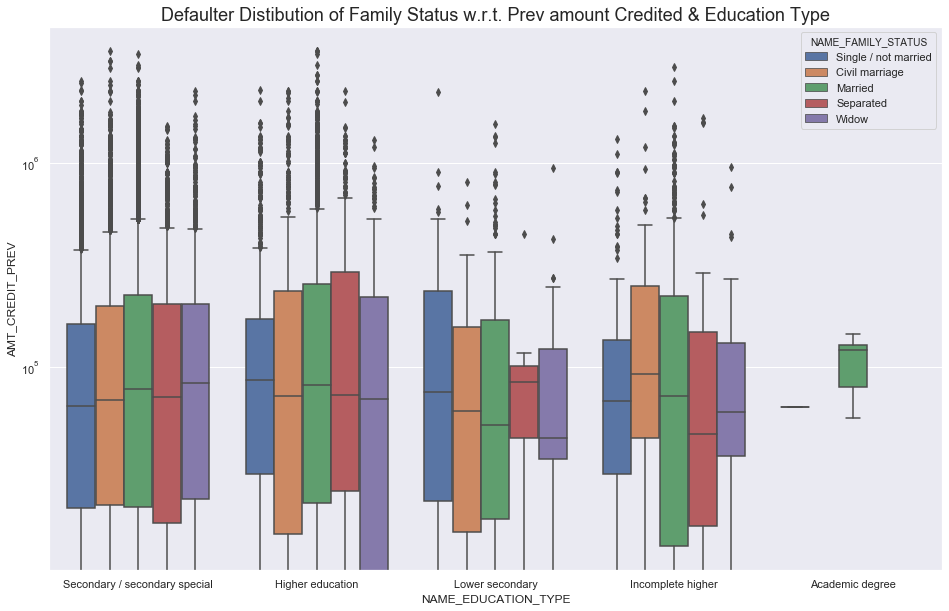

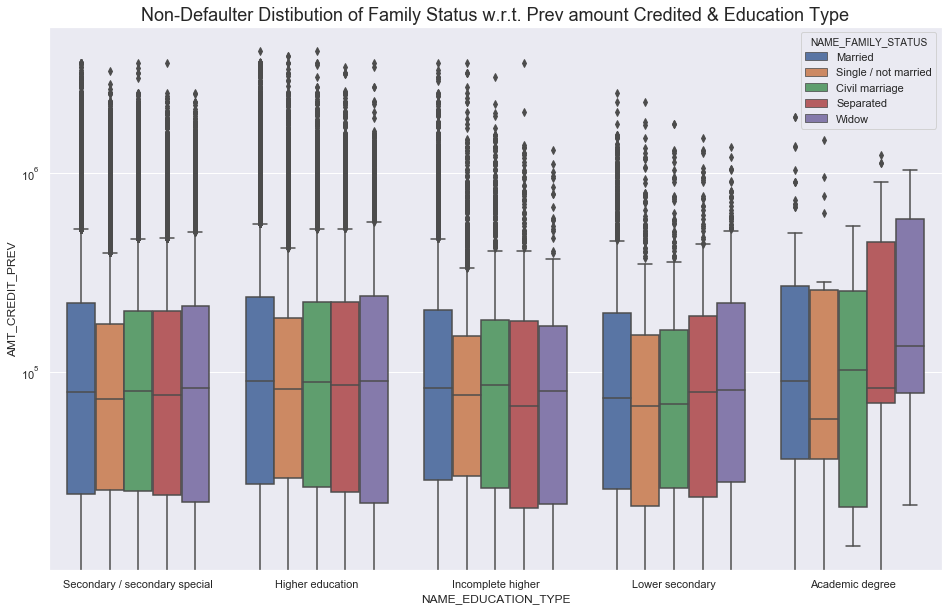

In [234]:
plt.figure(figsize=(16, 10))
sns.boxplot(data =target1_combine, x='NAME_EDUCATION_TYPE',hue='NAME_FAMILY_STATUS',y='AMT_CREDIT_PREV',orient='v')
plt.title('Defaulter Distibution of Family Status w.r.t. Prev amount Credited & Education Type', fontdict = {'fontsize':18})
plt.yscale('log')    
plt.show()

plt.figure(figsize=(16, 10))
sns.boxplot(data =target0_combine, x='NAME_EDUCATION_TYPE',hue='NAME_FAMILY_STATUS',y='AMT_CREDIT_PREV',orient='v')
plt.title('Non-Defaulter Distibution of Family Status w.r.t. Prev amount Credited & Education Type', fontdict = {'fontsize':18})
plt.yscale('log')
plt.show()

* Amoung Non-Defaulters, Window with Academic Degree has received the highest amount of credit for the loan whereas Single/not married with Academic degree has received least amount of credit for the loan. 

* Among Defaulters, clients who did Civil Marriage and with Imcomplete higher education status has applied for the received highest credit.
Whereas Windows with lower secondary education has received the least credit amount.

Also, 'Higher education' contains many outliers.
No outliers are present for clients having Academic degree but there income amount is little higher that Higher education.
Lower secondary of civil marriage family status are have less income amount than others.

Observations are Quite similar with Target 0
Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
Most of the outliers are from Education type 'Higher education' and 'Secondary'.
Civil marriage for Academic degree is having most of the credits in the third quartile.

There is also have some similarity with Target0,
Education type 'Higher education' the income amount is mostly equal with family status.
Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary are have less income amount than others.

<h4>c. Gender w.r.t. Previous Amount Credited & Housing Type</h4>

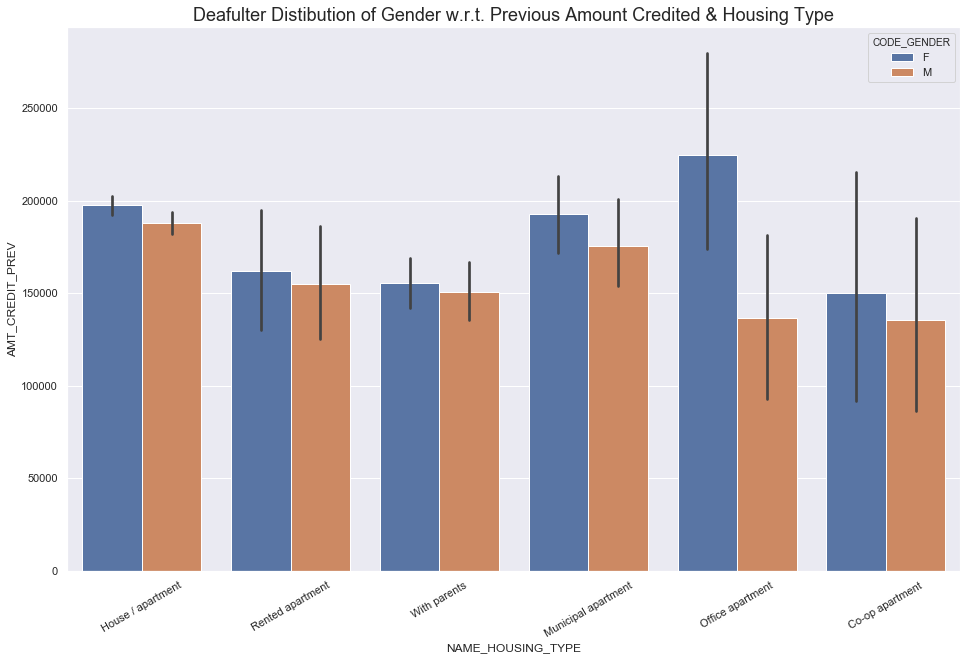

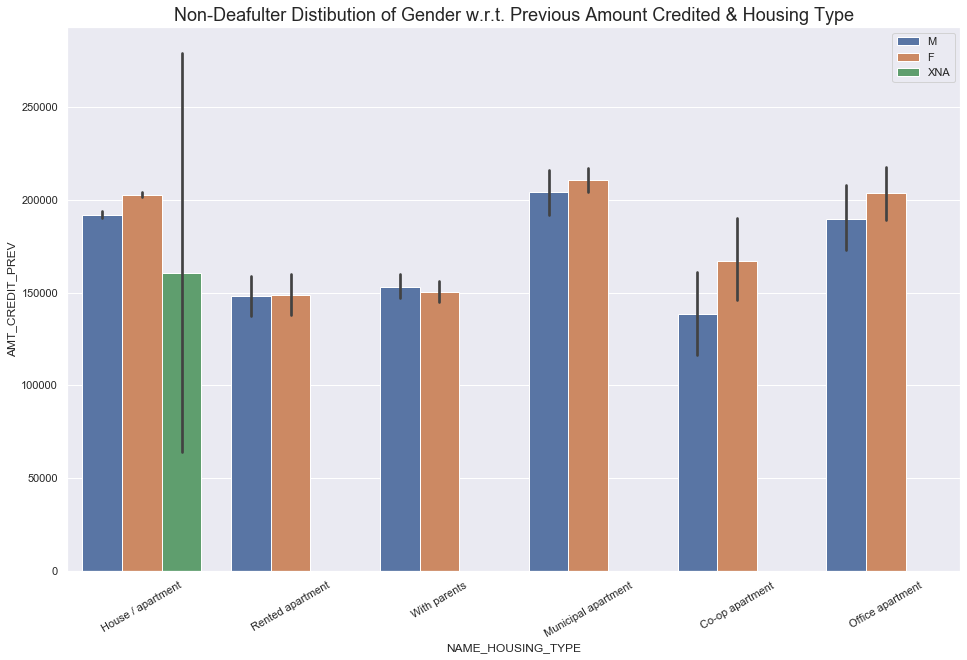

In [235]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16, 10))
plt.xticks(rotation=30)
sns.barplot(data =target1_combine, y='AMT_CREDIT_PREV',hue='CODE_GENDER',x='NAME_HOUSING_TYPE')
plt.title('Deafulter Distibution of Gender w.r.t. Previous Amount Credited & Housing Type', fontdict = {'fontsize':18})
plt.show()

plt.figure(figsize=(16, 10))
plt.xticks(rotation=30)
sns.barplot(data =target0_combine, y='AMT_CREDIT_PREV',hue='CODE_GENDER',x='NAME_HOUSING_TYPE')
plt.title('Non-Deafulter Distibution of Gender w.r.t. Previous Amount Credited & Housing Type', fontdict = {'fontsize':18})
plt.legend(loc='upper right')
plt.show()

* Among Defaulters, Office Appartment has received the highest credit amount but it has the many outliers. Followed by House/appartment who has taken the highest credit amount.
* Among Non-Defaulters, Municipal appartment has recieved the highest credit amount.
* So, Bank can focus mostly on housing type with parents or House\appartment or Municipal appartment for successful payments.

From the above we can conclude some points-

The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher. Income type of state servants have a significant amount of credit applied Money for third person or a Hobby is having less credits applied for.

#### Name Contract Type w.r.t. Name cash loan purpose

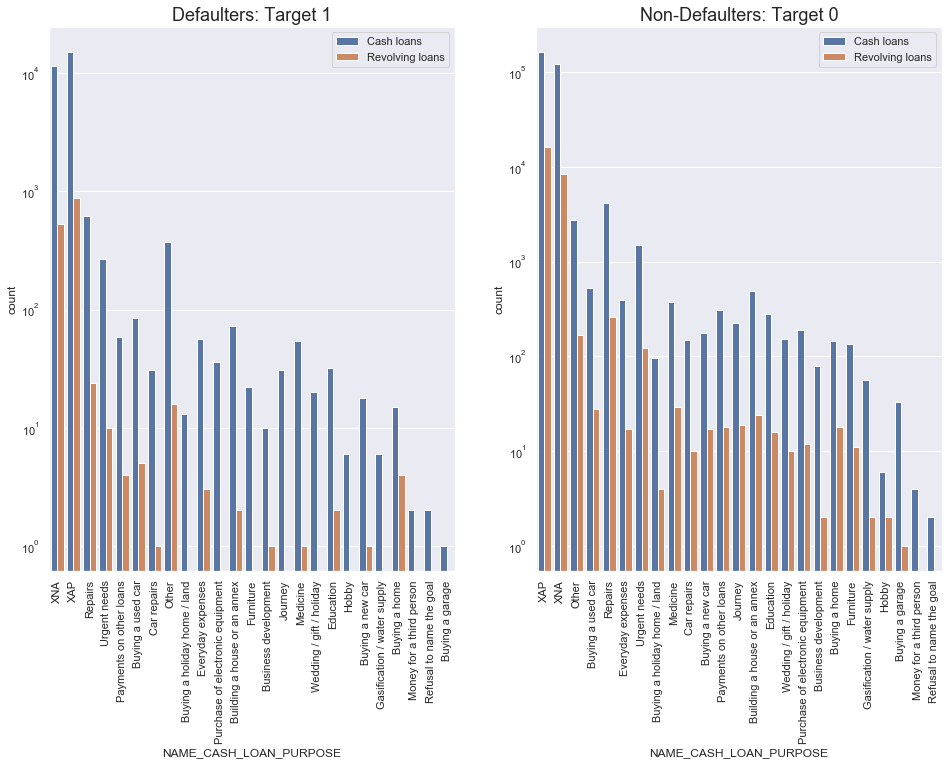

In [236]:
plt.figure(figsize = (16, 10))

plt.subplot(1, 2, 1)
sns.countplot(target1_combine["NAME_CASH_LOAN_PURPOSE"],hue="NAME_CONTRACT_TYPE",data=target1_combine,)
plt.title("Defaulters: Target 1", fontdict = {'fontsize':18})
plt.yscale('log')
plt.xticks(rotation = 90)
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
sns.countplot(target0_combine["NAME_CASH_LOAN_PURPOSE"],hue="NAME_CONTRACT_TYPE",data=target0_combine)
plt.title("Non-Defaulters: Target 0", fontdict = {'fontsize':18})
plt.yscale('log')    
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.show()


In this graph we see that people who have count of defaults for current applications in the sample, clients with history of previous applications have largest percents of defaults when in their history are previous applications for cash loans for Refusal to name the goal - Repairs,other and buying a used car.

#### Name Contract Type w.r.t. NAME_CLIENT_TYPE

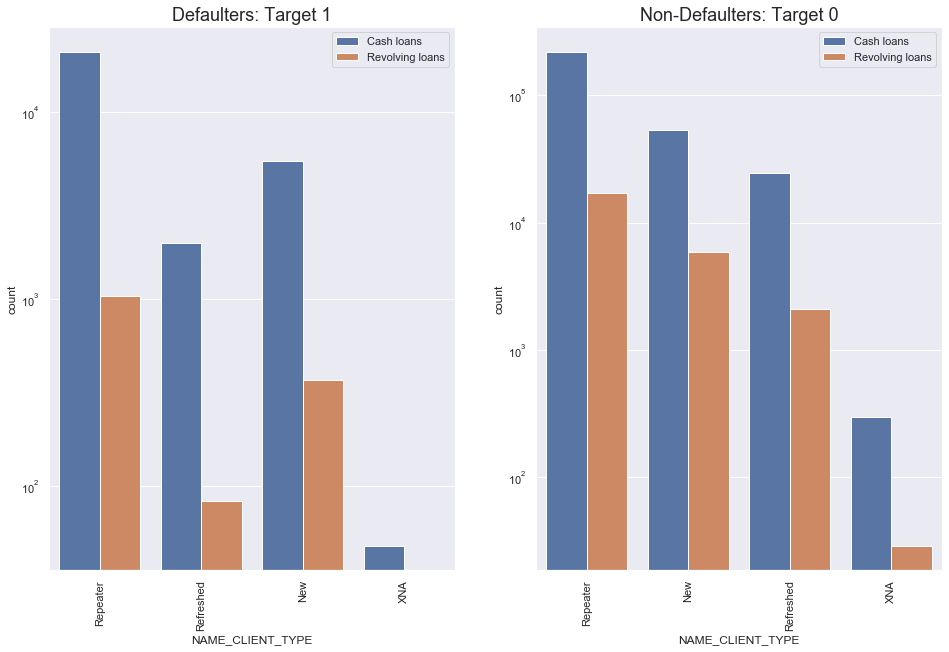

In [237]:
plt.figure(figsize = (16, 10))

plt.subplot(1, 2, 1)
sns.countplot(target1_combine["NAME_CLIENT_TYPE"],hue="NAME_CONTRACT_TYPE",data=target1_combine,)
plt.title("Defaulters: Target 1", fontdict = {'fontsize':18})
plt.yscale('log')
plt.xticks(rotation = 90)
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
sns.countplot(target0_combine["NAME_CLIENT_TYPE"],hue="NAME_CONTRACT_TYPE",data=target0_combine)
plt.title("Non-Defaulters: Target 0", fontdict = {'fontsize':18})
plt.yscale('log')    
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.show()

it is to surprise that In terms of default count for current applications of clients with history of previous applications, current clients with previous applications have defaulted the most whereas new clients are the second to default of the loan repayment.

# 6. Conclusion/Recomendation:

1. Banks should look into where is the applicant based and verify the permanent living address, work address and temporary address this could eliminate the red flag of whether the applicant can default on this loan or not.

2. Through our analysis of different variables of both the data set. We recommend the bank to look at variables such as Housing, Amount of income, Education and work type as a primary point of elevation of the loan application.

3. From our analysis, we have found an applicant who has Rented Apartments tended to default on their loan repayment.

4. From education, the prospective applicant who has secondary education tend to default on their loan repayments 

5. The bank should consider the Income of a loan applicant and can check with the amount of credit the applicant has. This factor will tell the bank whether the applicant is able to repay the loan amount or not. 

6. Ext Source displays the greatest difference between the values of the target. It can be clearly observed from the graph that with a small value of Ext Sourcehigher is the defaulter rate. And as the Ext Source value increases the rate of the client becoming defaulter decreases so the bank should also check the Ext source 
 
7. Bank can also focus on the cash loan purpose as it will help to determine whether the application will be default on the loan repayment or not.

8. Bank can look the pervious loan application can check it the applicant has good repo with banks in terms of its transactions and how loyal is with the bank and how long he has been maintaining the account with the bank 
 